In [2]:
from datetime import datetime

from uuid import uuid4

import numpy as np
from dateutil import tz

from pynwb import NWBHDF5IO, NWBFile, TimeSeries
from pynwb.behavior import Position, SpatialSeries
from pynwb.epoch import TimeIntervals
from pynwb.file import Subject

with NWBHDF5IO("613467928_ephys.nwb", "r") as io:
    read_nwbfile = io.read()
    print(read_nwbfile)
    #print(read_nwbfile.acquisition["test_timeseries"].data[:])

ValueError: 'comments' already exists in Sweep_10.attributes, cannot set in datasets.

In [24]:
# Specify the path to your NWB file
nwb_file_path = '614725975_ephys.nwb'

# Open the NWB file for reading
with NWBHDF5IO(nwb_file_path, 'r') as io:
    nwbfile = io.read()

    # Now you can access various data fields in the NWB file
    # For example, to access the electrode information:
    electrode_table = nwbfile.electrodes
    print(electrode_table)

ValueError: 'comments' already exists in Sweep_10.attributes, cannot set in datasets.

In [25]:
from pynwb import NWBHDF5IO
from hdmf.validate import Validator

nwb_file_path = '614725975_ephys.nwb'

with NWBHDF5IO(nwb_file_path, 'r') as io:
    nwbfile = io.read()

    # Now you can access different data fields in the NWB file
    # For example, to access the electrode information:
    electrode_table = nwbfile.electrodes
    print(electrode_table)


ValueError: 'comments' already exists in Sweep_10.attributes, cannot set in datasets.

In [26]:
import allensdk
from allensdk.core.nwb_data_set import NwbDataSet

# if you ran the examples above, you will have a NWB file here
file_name = 'cell_types/specimen_485909730/ephys.nwb'
data_set = NwbDataSet(file_name)

sweep_numbers = data_set.get_sweep_numbers()
sweep_number = sweep_numbers[0] 
sweep_data = data_set.get_sweep(sweep_number)

# spike times are in seconds relative to the start of the sweep
spike_times = data_set.get_spike_times(sweep_number)

# stimulus is a numpy array in amps
stimulus = sweep_data['stimulus']

# response is a numpy array in volts
reponse = sweep_data['response']

# sampling rate is in Hz
sampling_rate = sweep_data['sampling_rate']

# start/stop indices that exclude the experimental test pulse (if applicable)
index_range = sweep_data['index_range']

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'cell_types/specimen_485909730/ephys.nwb', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

# Step One: Get Cells & Manipulate Dataframe

In [2]:
import requests
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
from allensdk.api.queries.image_download_api import ImageDownloadApi

donor_name = 'H14.09.010'

In [3]:
#Import the "Cell Types Cache" from the AllenSDK core package
from allensdk.core.cell_types_cache import CellTypesCache

#Import CellTypesApi, which will allow us to query the database.
from allensdk.api.queries.cell_types_api import CellTypesApi

# We'll then initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

In [4]:
human_cells = ctc.get_cells(species=[CellTypesApi.HUMAN])
human_cells

[{'reporter_status': None,
  'cell_soma_location': [273.0, 354.0, 216.0],
  'species': 'Homo Sapiens',
  'id': 525011903,
  'name': 'H16.03.003.01.14.02',
  'structure_layer_name': '3',
  'structure_area_id': 12113,
  'structure_area_abbrev': 'FroL',
  'transgenic_line': '',
  'dendrite_type': 'spiny',
  'apical': 'intact',
  'reconstruction_type': None,
  'disease_state': 'epilepsy',
  'donor_id': 524848408,
  'structure_hemisphere': 'right',
  'normalized_depth': None},
 {'reporter_status': None,
  'cell_soma_location': [69.0, 254.0, 96.0],
  'species': 'Homo Sapiens',
  'id': 528642047,
  'name': 'H16.06.009.01.02.06.05',
  'structure_layer_name': '5',
  'structure_area_id': 12141,
  'structure_area_abbrev': 'MTG',
  'transgenic_line': '',
  'dendrite_type': 'aspiny',
  'apical': 'NA',
  'reconstruction_type': None,
  'disease_state': 'epilepsy',
  'donor_id': 528574320,
  'structure_hemisphere': 'left',
  'normalized_depth': None},
 {'reporter_status': None,
  'cell_soma_location':

In [7]:
import pandas as pd
human_df = pd.DataFrame(human_cells)
human_df_filtered = human_df[(human_df["disease_state"] == "epilepsy") & (human_df["structure_area_abbrev"] == "MTG")  & (human_df["structure_layer_name"] == '3') & (human_df["dendrite_type"] == "spiny") ]
#list of all human_df cells
id_list = human_df["id"]
human_df_filtered

reporter_status     cell_soma_location       species         id  \
3              None    [79.0, 273.0, 91.0]  Homo Sapiens  519832676   
7              None   [312.0, 280.0, 89.0]  Homo Sapiens  545608578   
8              None    [79.0, 273.0, 86.0]  Homo Sapiens  561467633   
10             None   [70.0, 260.0, 111.0]  Homo Sapiens  530055374   
13             None  [325.0, 261.0, 109.0]  Homo Sapiens  488418919   
..              ...                    ...           ...        ...   
400            None   [313.0, 280.0, 94.0]  Homo Sapiens  569844159   
401            None   [70.0, 260.0, 108.0]  Homo Sapiens  528625591   
403            None   [70.0, 249.0, 103.0]  Homo Sapiens  505690787   
407            None  [325.0, 257.0, 102.0]  Homo Sapiens  508298270   
408            None   [312.0, 280.0, 89.0]  Homo Sapiens  545612828   

                       name structure_layer_name  structure_area_id  \
3       H16.03.001.01.09.01                    3              12141   
7       H16.03.010.13.06.01                    3              12141   
8       H16.06.013.12.08.05                    3              12141   
10   H16.06.010.01.03.14.01                    3              12141   
13      H15.06.017.03.04.01                    3              12141   
..                      ...                  ...                ...   
400     H17.03.002.11.04.04                    3              12141   
401  H16.06.009.01.01.06.04                    3              12141   
403     H16.06.003.01.08.02                    3              12141   
407     H16.06.004.01.04.05                    3              12141   
408     H16.03.010.13.05.03                    3              12141   

    structure_area_abbrev transgenic_line dendrite_type     apical  \
3                     MTG                         spiny  truncated   
7                     MTG                         spiny     intact   
8                     MTG                         spiny  truncated   
10                    MTG                         spiny  truncated   
13                    MTG                         spiny     intact   
..                    ...             ...           ...        ...   
400                   MTG                         spiny     intact   
401                   MTG                         spiny     intact   
403                   MTG                         spiny     intact   
407                   MTG                         spiny     intact   
408                   MTG                         spiny     intact   

    reconstruction_type disease_state   donor_id structure_hemisphere  \
3                  full      epilepsy  518641172                 left   
7                  None      epilepsy  545510854                right   
8                  None      epilepsy  561414332                 left   
10                 None      epilepsy  529678110                 left   
13                 None      epilepsy  487502058                right   
..                  ...           ...        ...                  ...   
400                full      epilepsy  569800644                right   
401                None      epilepsy  528574320                 left   
403                None      epilepsy  504919864                 left   
407                full      epilepsy  504921484                right   
408                full      epilepsy  545510854                right   

     normalized_depth  
3            0.290951  
7                 NaN  
8                 NaN  
10                NaN  
13                NaN  
..                ...  
400          0.212041  
401               NaN  
403               NaN  
407          0.095478  
408          0.223071  

[127 rows x 16 columns]

# Step Two: Get Electrophysiology Data

In [31]:
from allensdk.core.nwb_data_set import NwbDataSet

dataset_id = 528642047  # internal ID that AIBS uses for this cell

# we can use the Allen SDK API to easily query the metadata for each of the recorded single cells
from allensdk.api.queries.cell_types_api import CellTypesApi

ct = CellTypesApi()

# use the SDK API to get a list of single cells and corresponding metadata
cell_metadata_list = ct.list_cells(require_reconstruction=False)

# convert that list of cells' metadata to a python dictionary for easy access
cell_meta_dict = {}
for i in range(len(cell_metadata_list)):
    cell_meta_dict[cell_metadata_list[i]['id']] = cell_metadata_list[i]

# print some summary metadata for the cell
print('Some basic metadata from this cell from the API')
print('Cell name: ' , cell_meta_dict[dataset_id]['name'])
print('Cell ID: ' , cell_meta_dict[dataset_id]['id'])
print('Brain region: ' , cell_meta_dict[dataset_id]['structure']['name'])

# uncomment this line to see all the metadata associated with each cell returned from the API
#print cell_meta_dict[dataset_id]



C:\Users\afcad\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:11: VisibleDeprecationWarning: Function list_cells is deprecated. please use list_cells_api instead
  # This is added back by InteractiveShellApp.init_path()


Some basic metadata from this cell from the API
Cell name:  H16.06.009.01.02.06.05
Cell ID:  528642047
Brain region:  middle temporal gyrus


C:\Users\afcad\anaconda3\envs\py37\lib\site-packages\allensdk\api\queries\cell_types_api.py:156: VisibleDeprecationWarning: Function filter_cells is deprecated. please use filter_cells_api
  result = self.filter_cells(cells, require_morphology, require_reconstruction, reporter_status, species)


In [32]:
from allensdk.core.nwb_data_set import NwbDataSet

# if you ran the examples above, you will have a NWB file here
file_name = '616646934_ephys.nwb'
data_set = NwbDataSet(file_name)

sweep_numbers = data_set.get_sweep_numbers()
sweep_number = sweep_numbers[0] 
sweep_data = data_set.get_sweep(sweep_number)

# spike times are in seconds relative to the start of the sweep
spike_times = data_set.get_spike_times(sweep_number)

# stimulus is a numpy array in amps
stimulus = sweep_data['stimulus']

# response is a numpy array in volts
reponse = sweep_data['response']

# sampling rate is in Hz
sampling_rate = sweep_data['sampling_rate']

# start/stop indices that exclude the experimental test pulse (if applicable)
index_range = sweep_data['index_range']
reponse


array([-0.06962501, -0.0695625 , -0.06962501, ..., -0.06915625,
       -0.06915625, -0.06915625], dtype=float32)

In [33]:
from allensdk.core.cell_types_cache import CellTypesCache
import os
from pathlib import Path
output_dir = '.'

# Instantiate the CellTypesCache instance.  The manifest_file argument
# tells it where to store the manifest, which is a JSON file that tracks
# file paths.  If you supply a relative path it will go into your
# current working directory
try:
    ctc = CellTypesCache(manifest_file=Path(output_dir) / 'manifest.json')
except:
    os.remove(Path(output_dir) / 'manifest.json')
    ctc = CellTypesCache(manifest_file=Path(output_dir) / 'manifest.json')
    
# this saves the NWB file to 'cell_types/specimen_464212183/ephys.nwb'
cell_specimen_id = 616647103
data_set = ctc.get_ephys_data(cell_specimen_id)

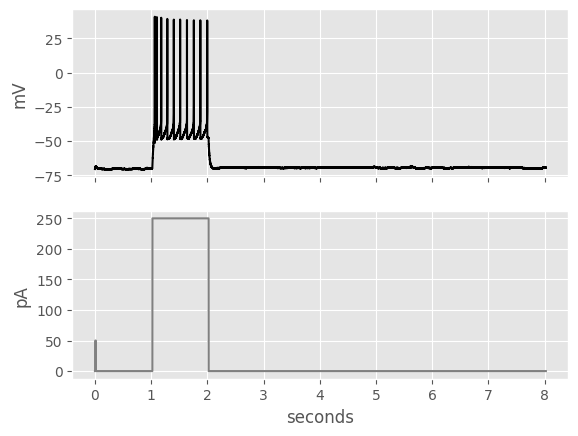

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

sweep_number = 57
sweep_data = data_set.get_sweep(sweep_number)

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"][0:index_range[1]+1] # in A
v = sweep_data["response"][0:index_range[1]+1] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV

sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(0, len(v)) * (1.0 / sampling_rate)

plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(t, v, color='black')
axes[1].plot(t, i, color='gray')
axes[0].set_ylabel("mV")
axes[1].set_ylabel("pA")
axes[1].set_xlabel("seconds")
plt.show()

Sweep 1 does not exist.
Sweep 2 does not exist.
Sweep 3 does not exist.


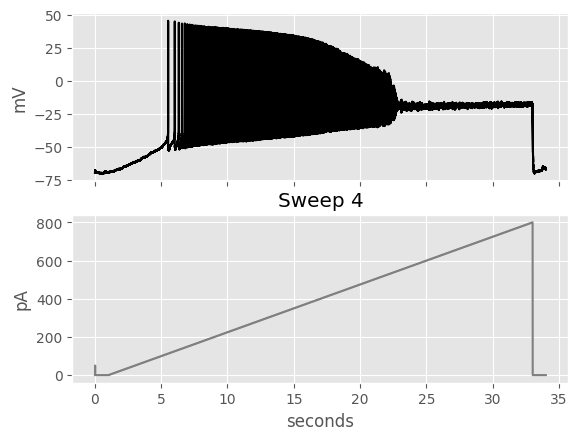

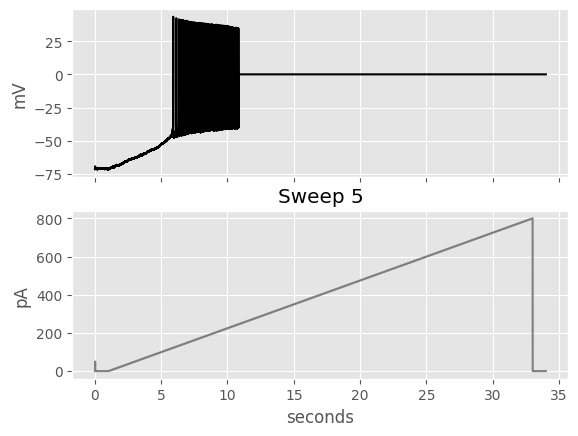

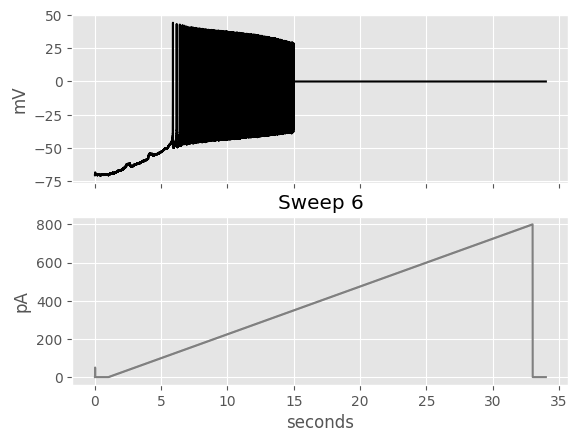

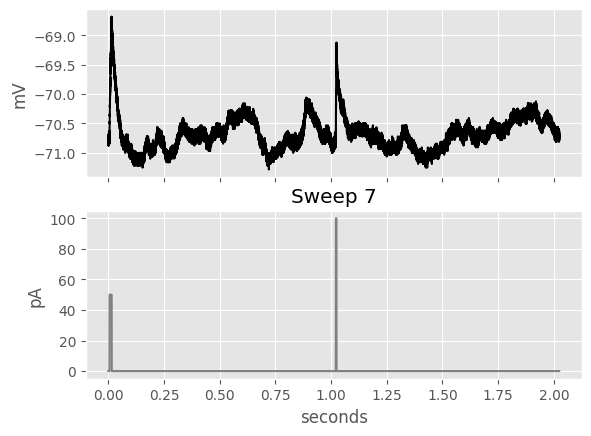

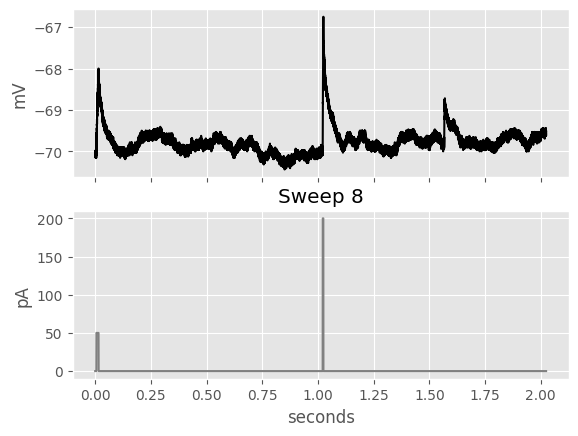

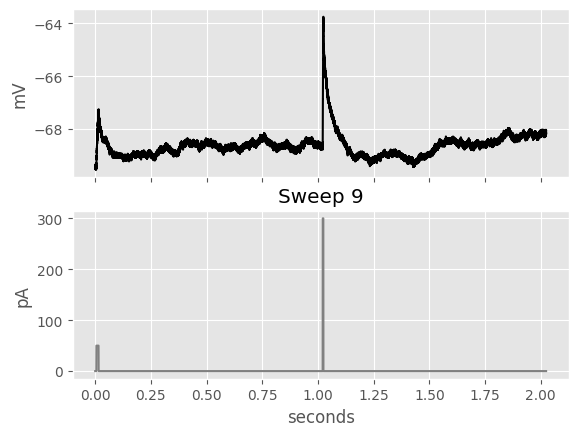

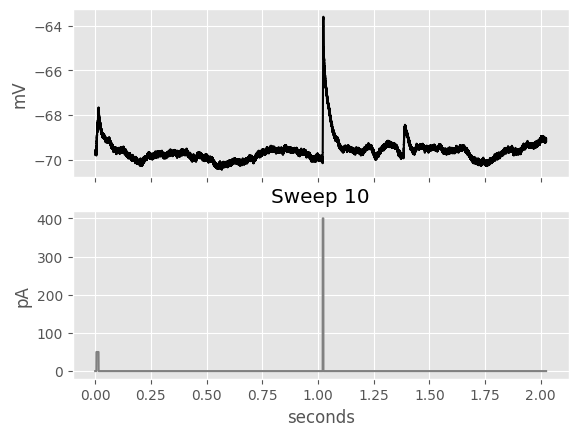

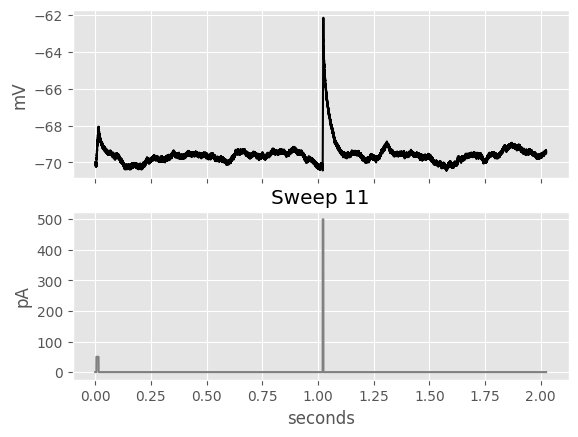

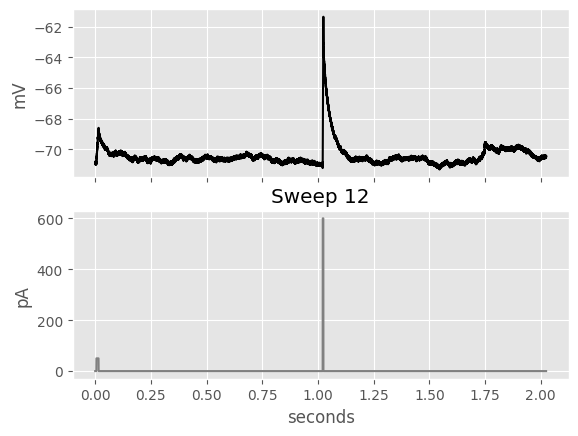

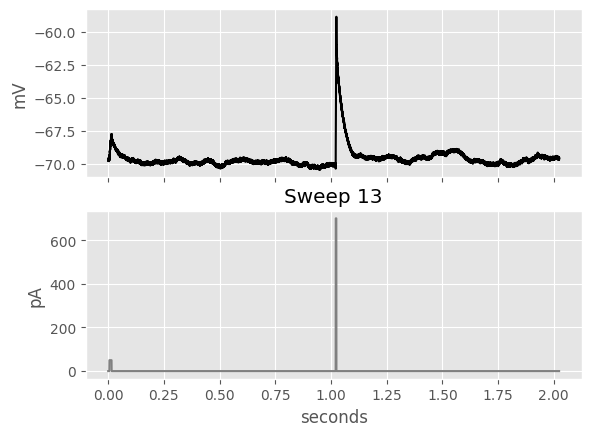

Sweep 14 does not exist.
Sweep 15 does not exist.


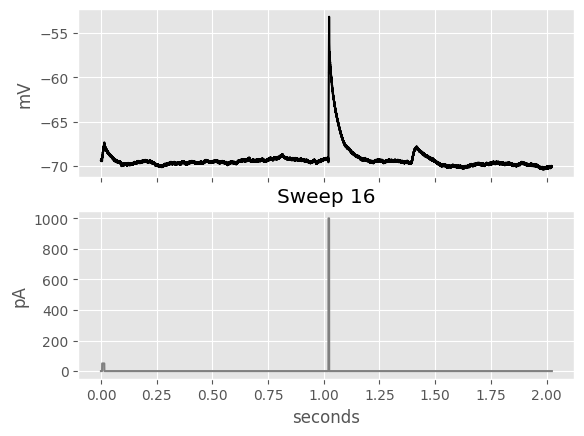

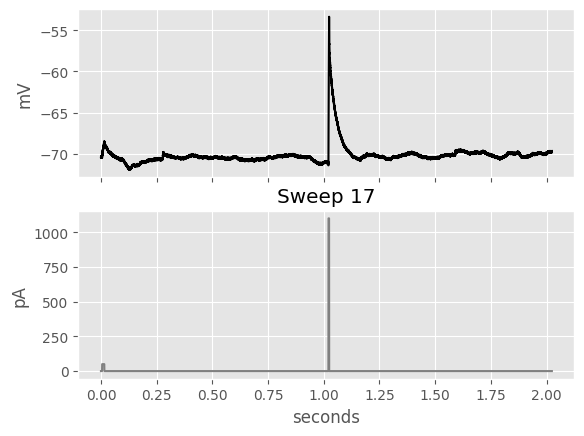

Sweep 18 does not exist.


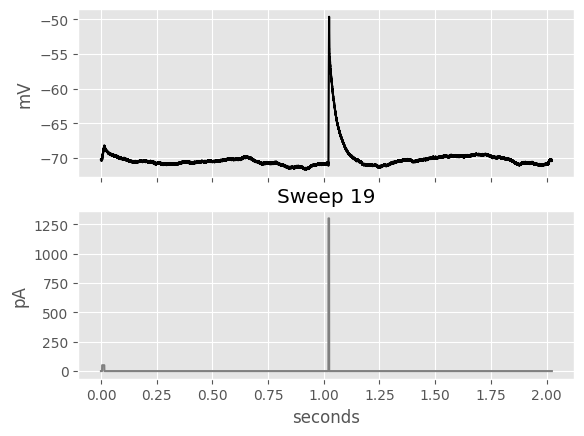

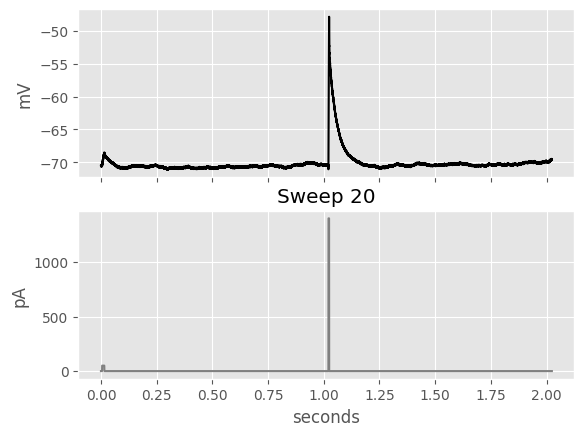

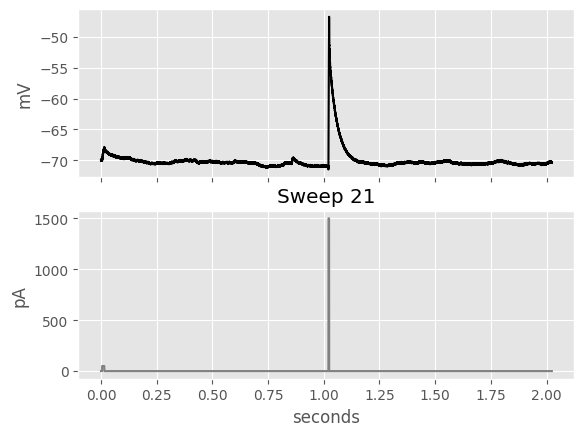

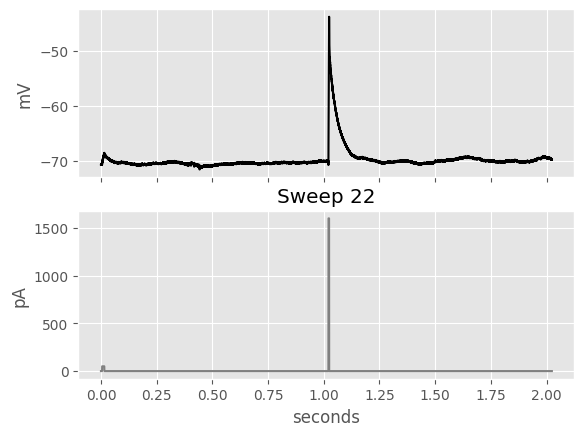

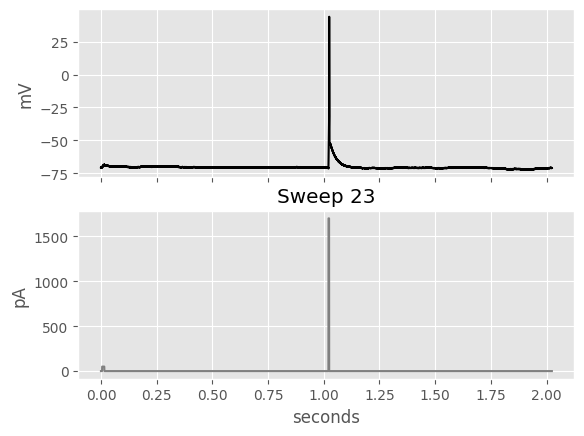

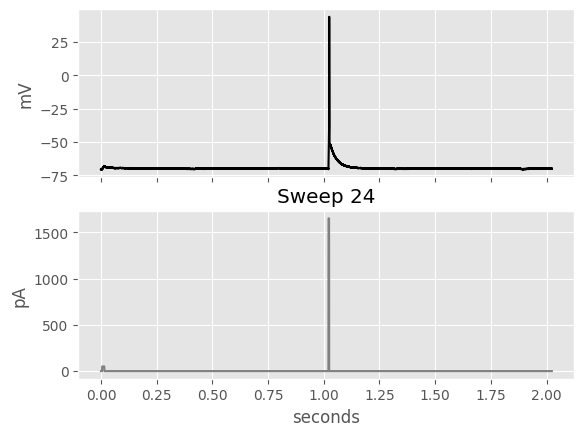

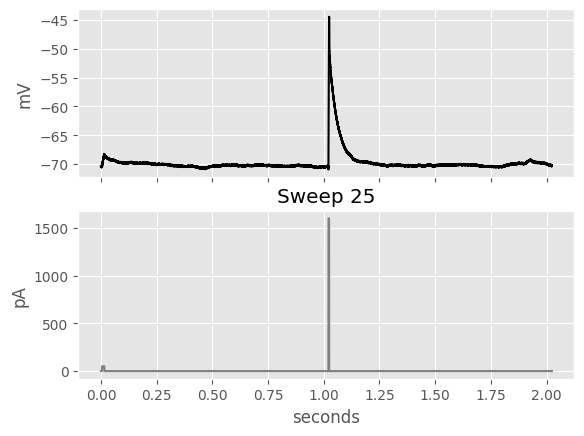

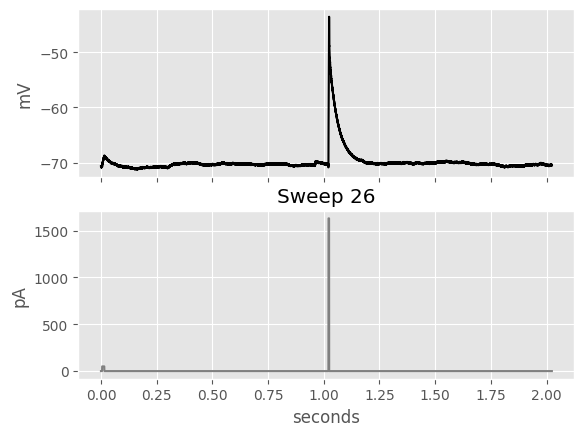

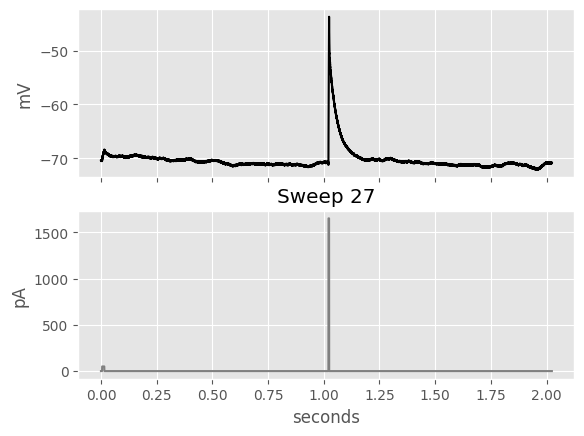

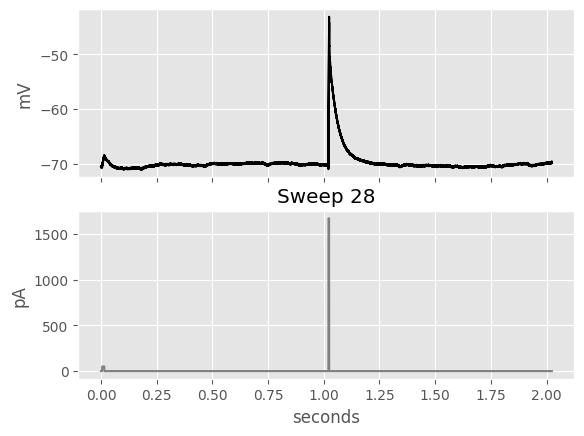

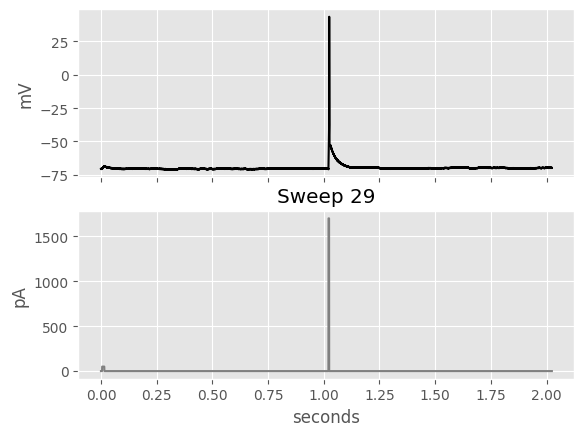

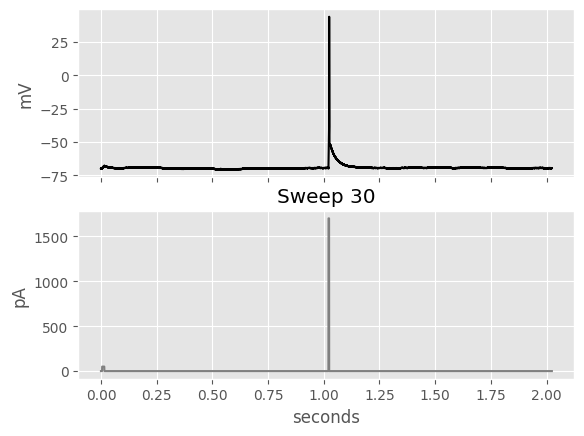

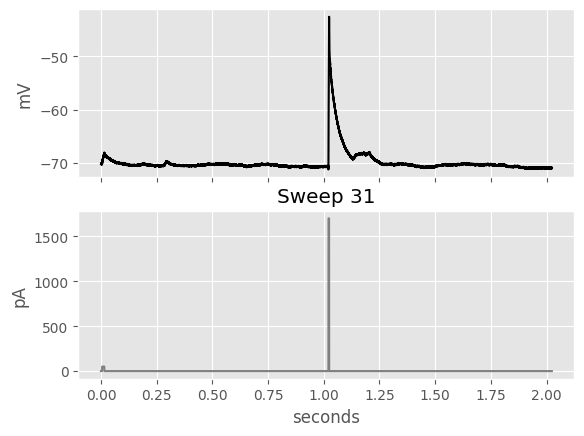

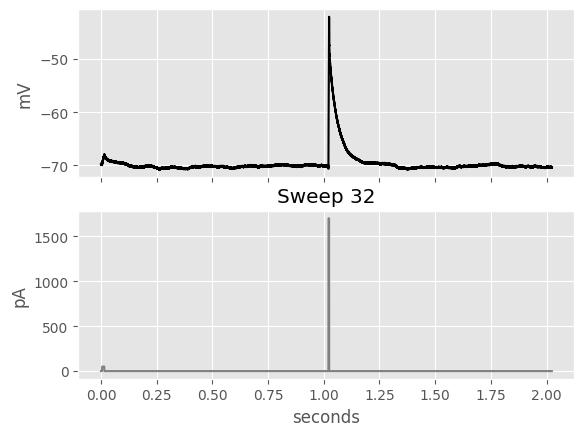

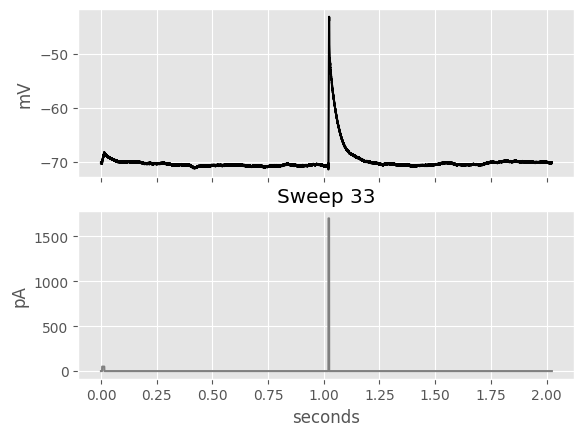

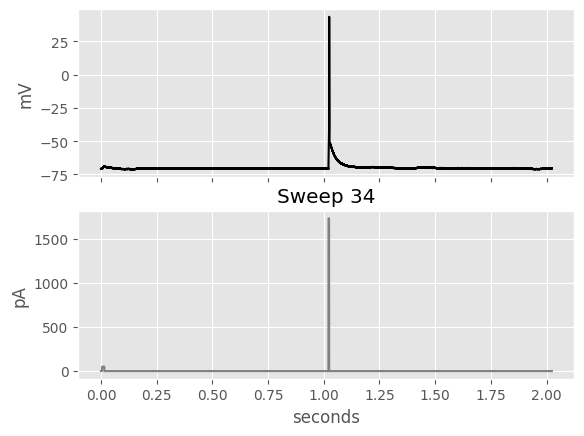

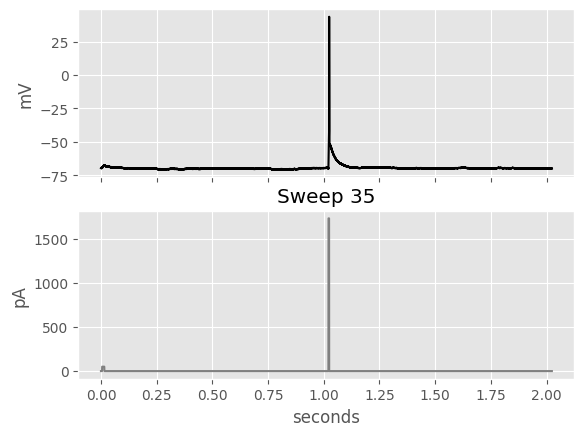

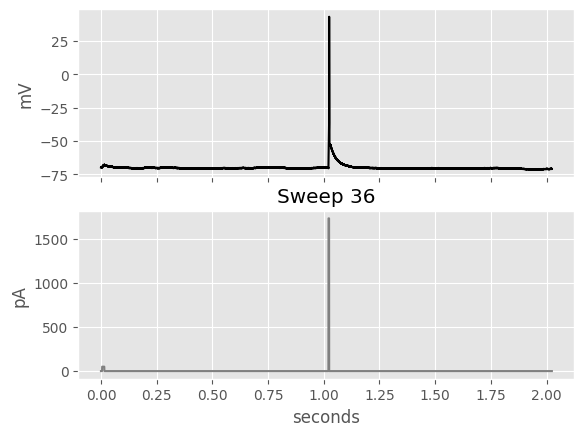

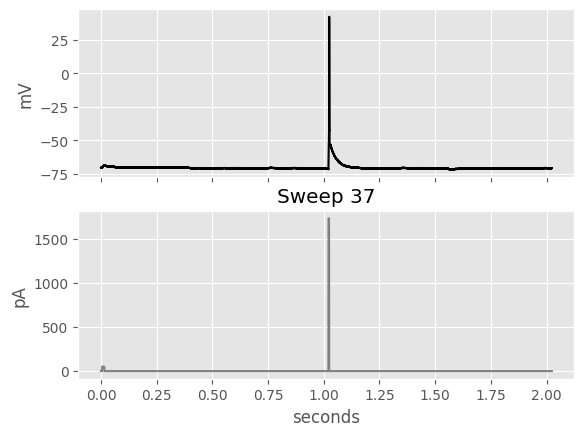

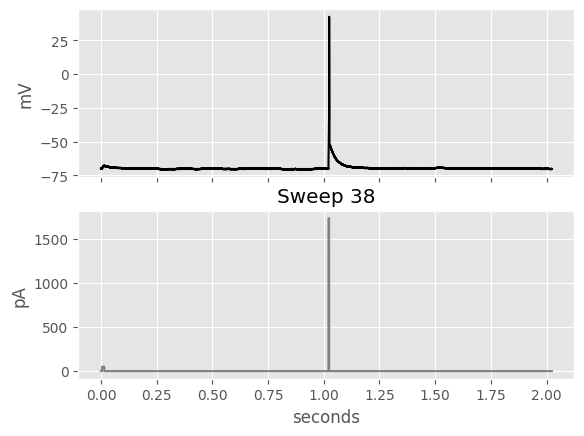

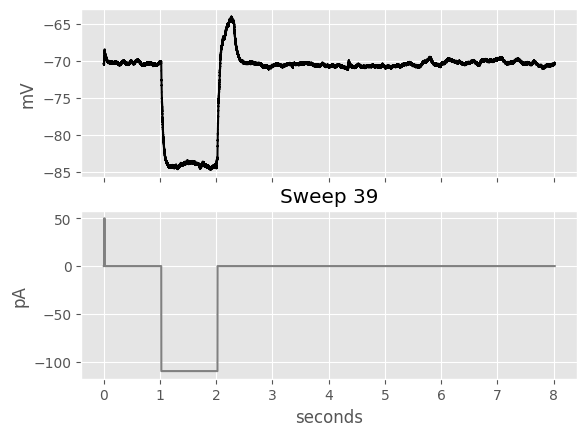

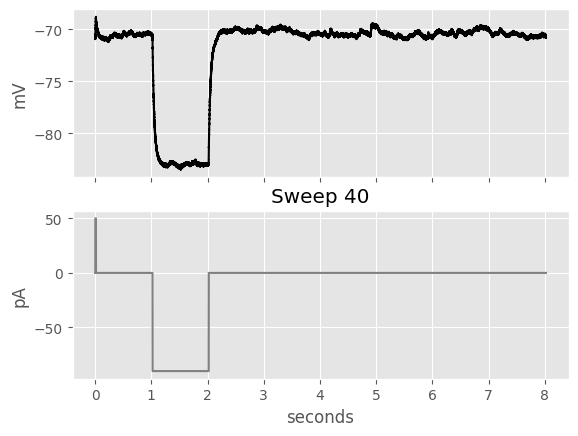

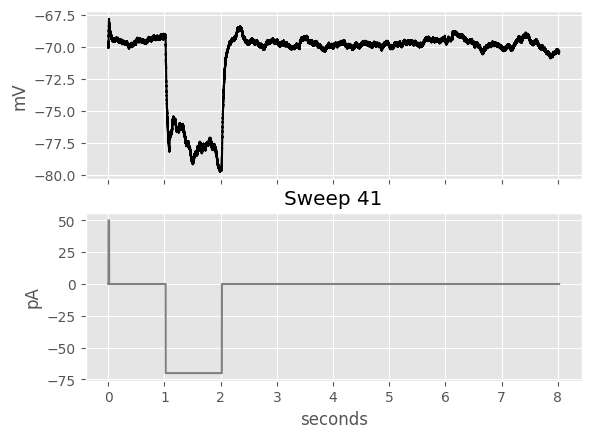

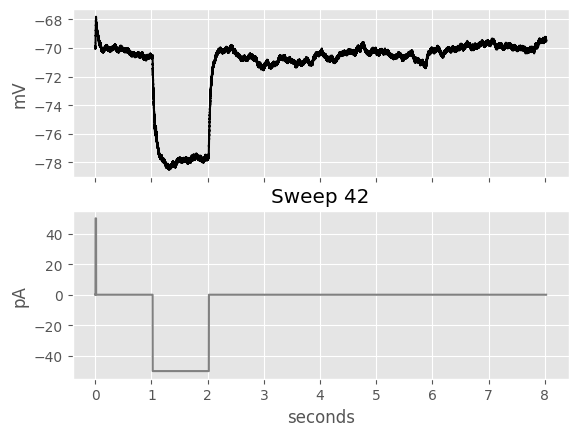

Sweep 43 does not exist.
Sweep 44 does not exist.


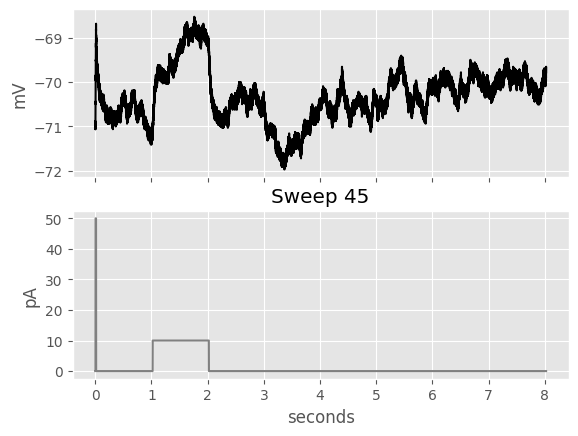

Sweep 46 does not exist.


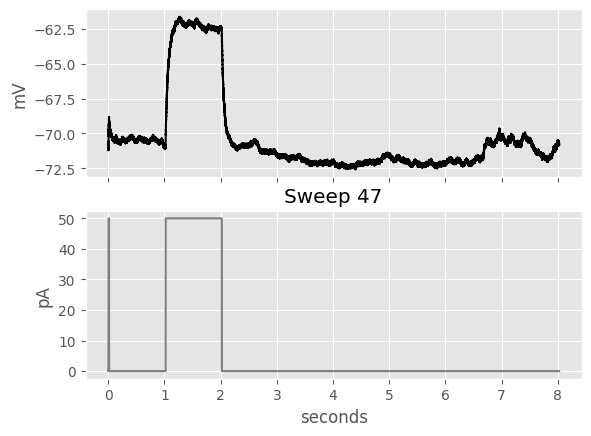

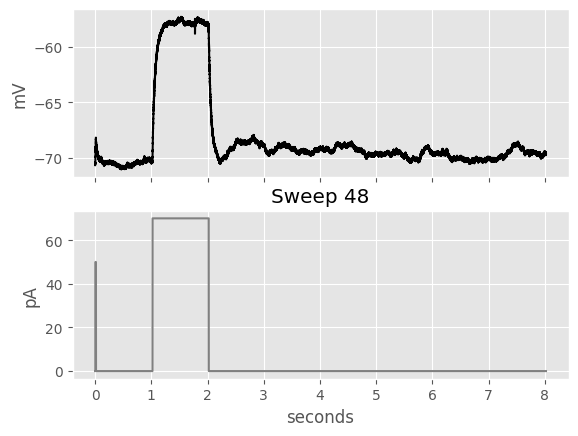

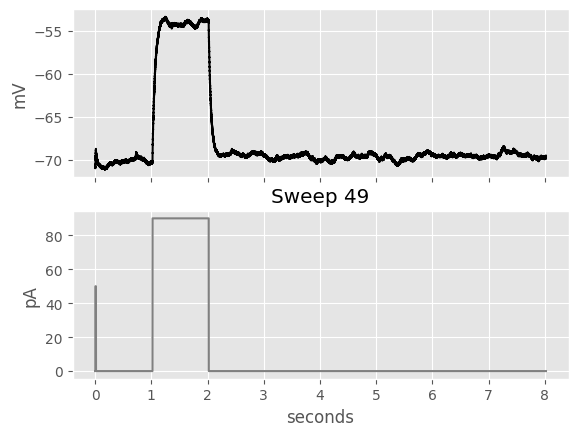

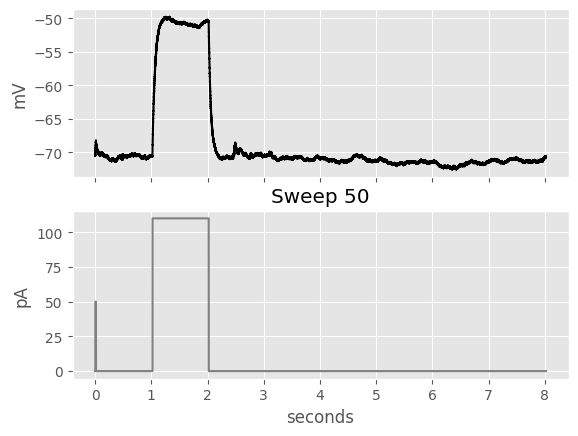

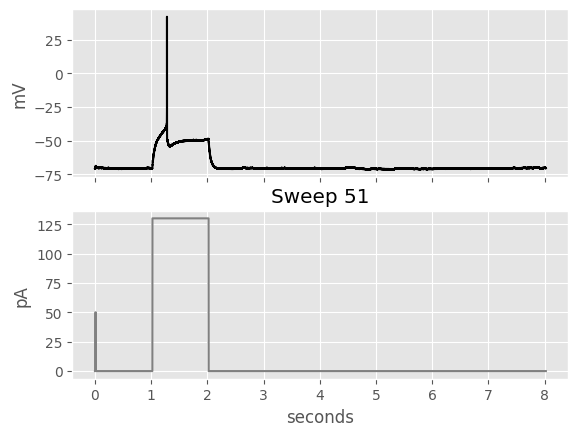

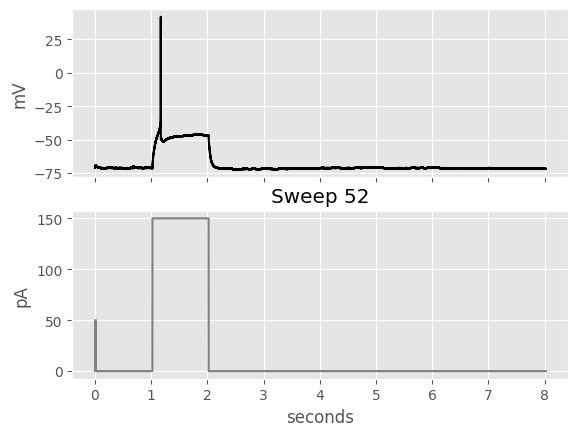

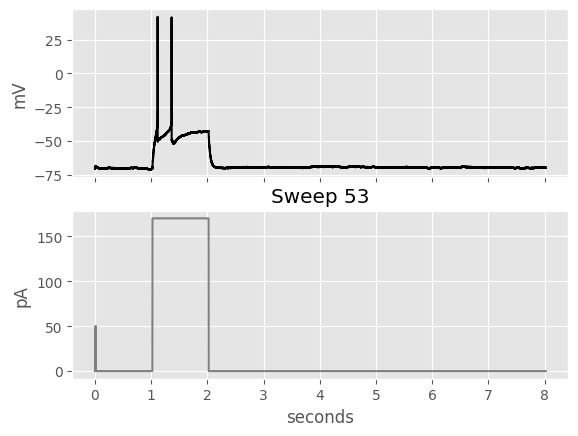

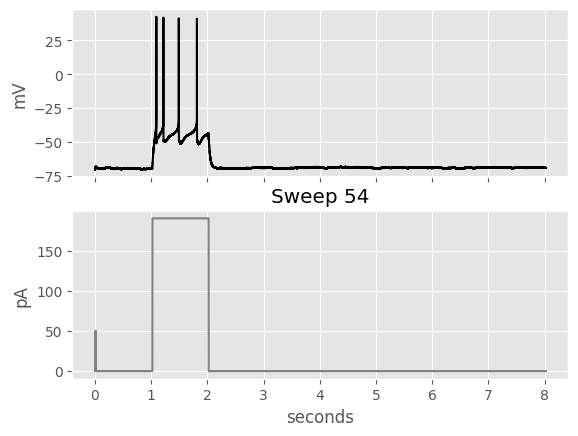

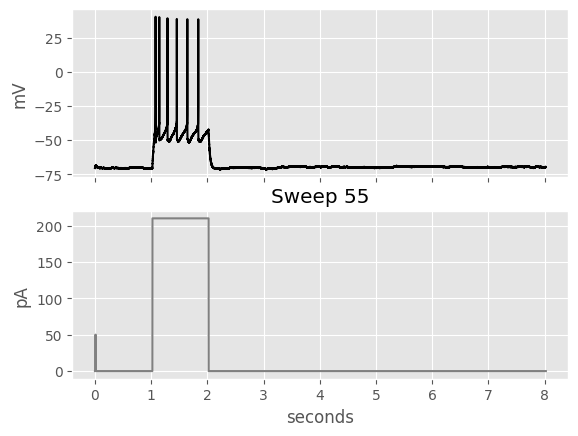

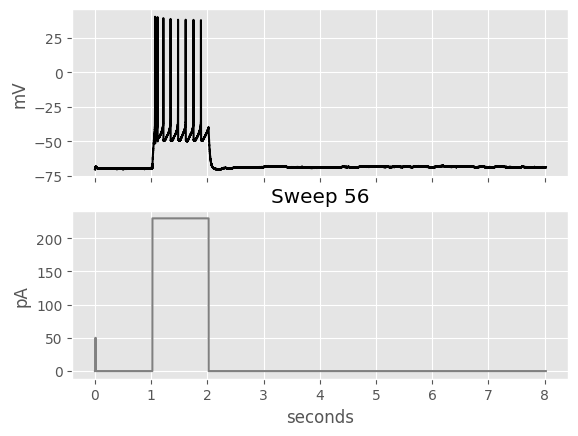

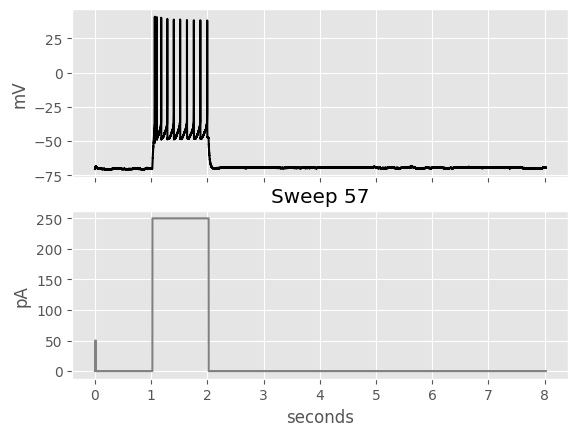

Sweep 58 does not exist.
Sweep 59 does not exist.


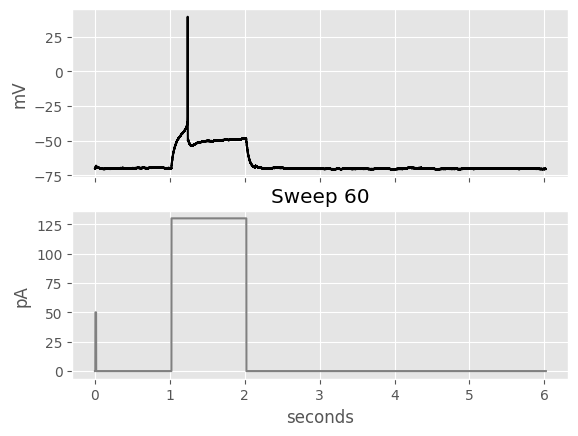

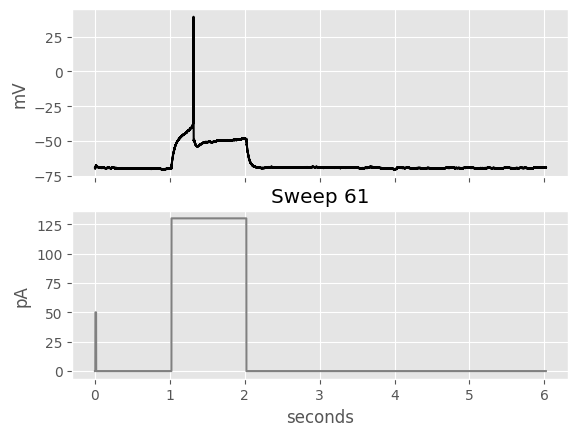

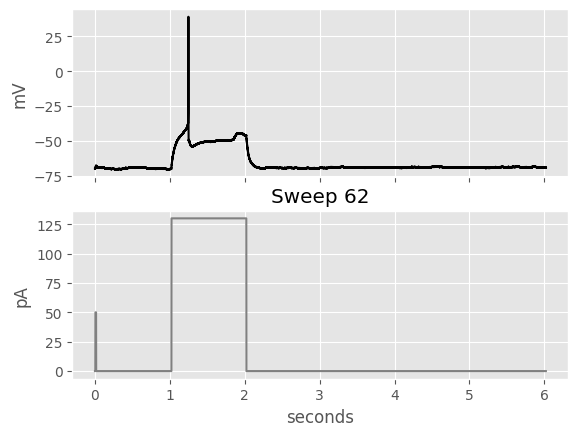

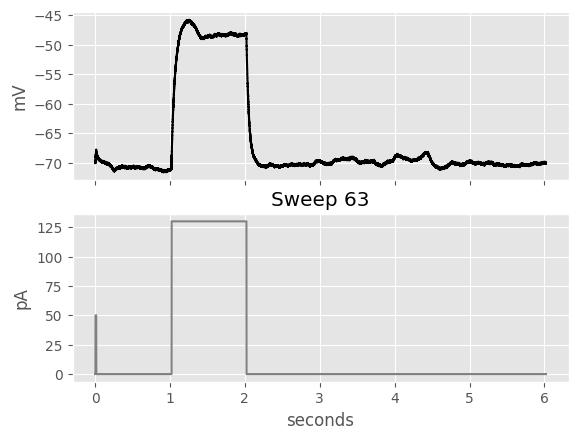

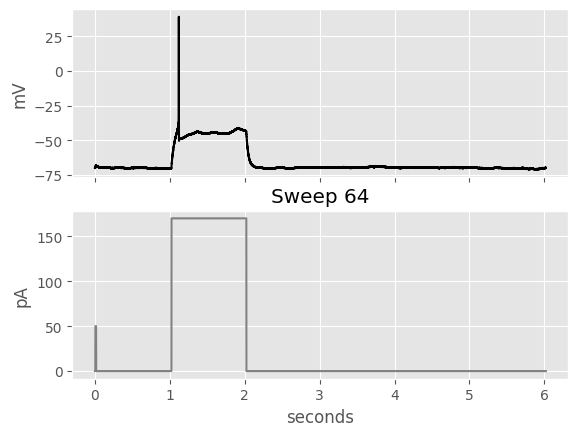

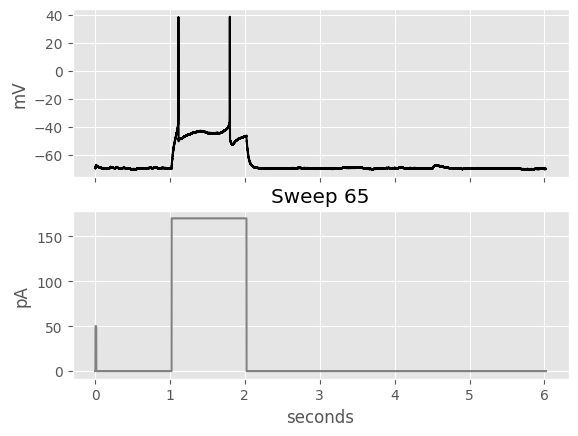

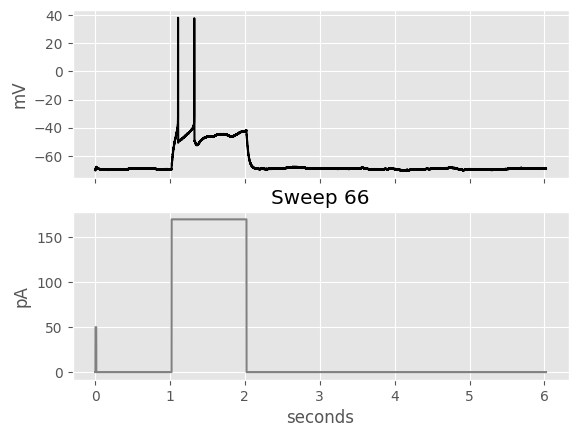

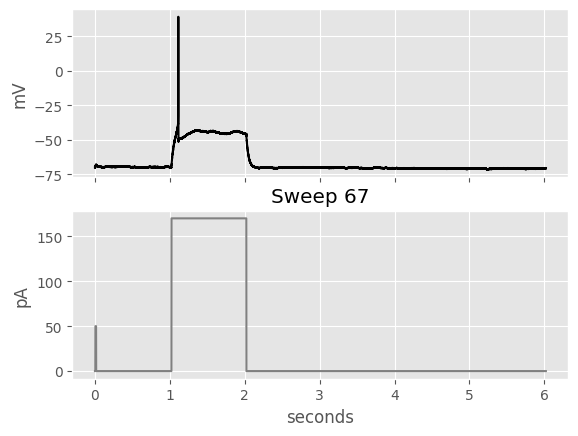

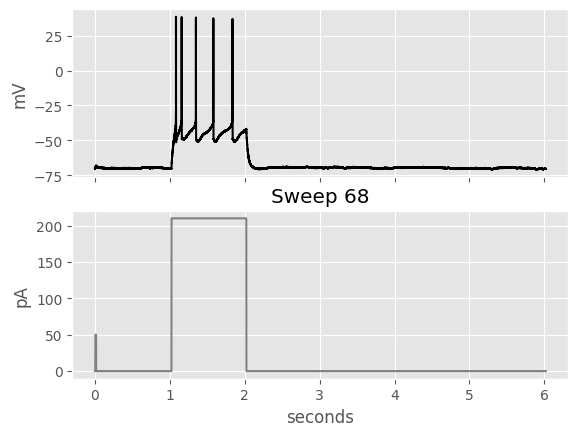

Sweep 69 does not exist.


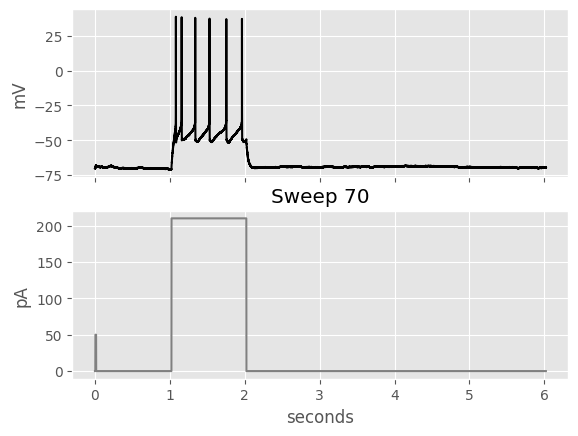

Sweep 71 does not exist.
Sweep 72 does not exist.
Sweep 73 does not exist.
Sweep 74 does not exist.
Sweep 75 does not exist.
Sweep 76 does not exist.
Sweep 77 does not exist.


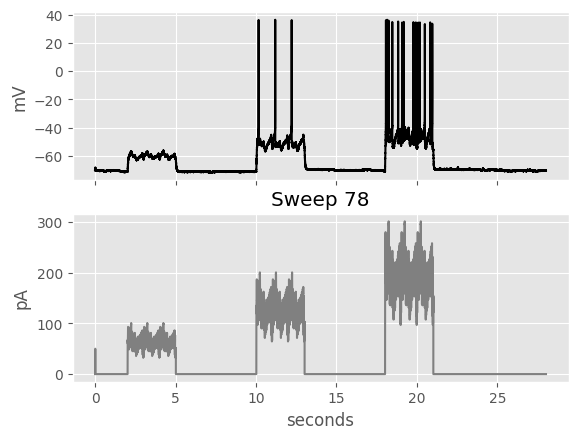

Sweep 79 does not exist.


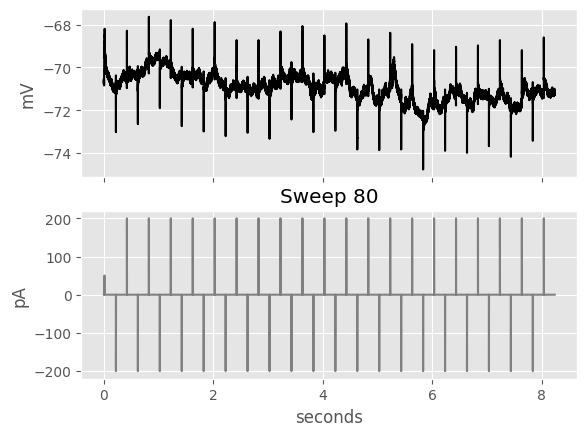

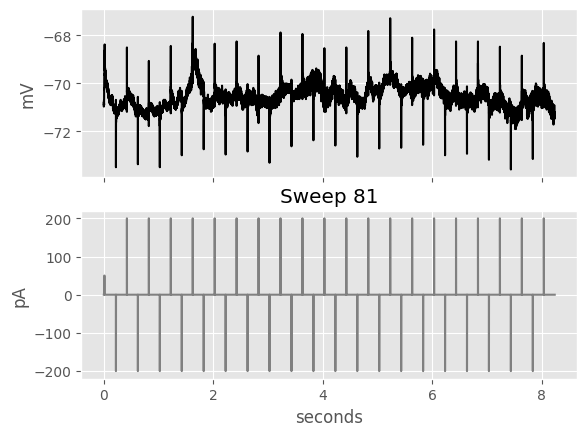

Sweep 82 does not exist.


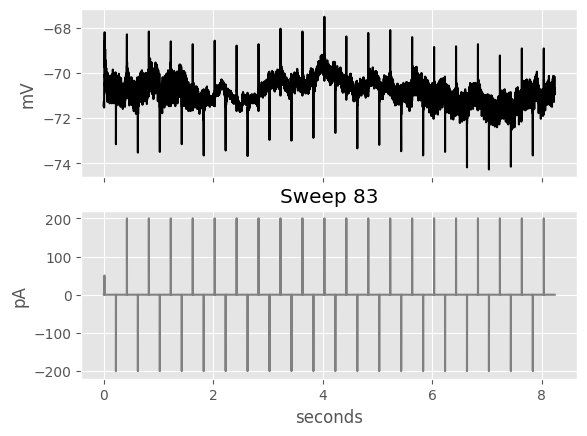

Sweep 84 does not exist.


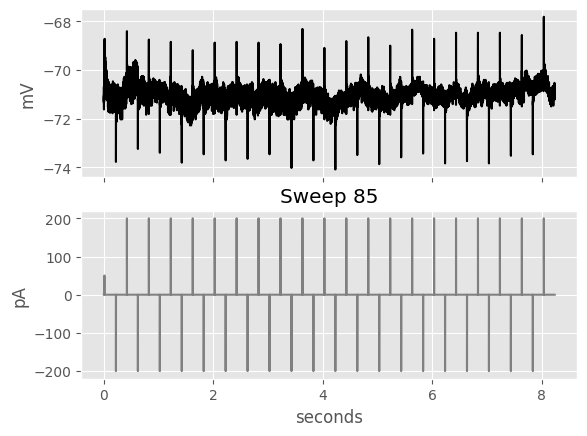

Sweep 86 does not exist.


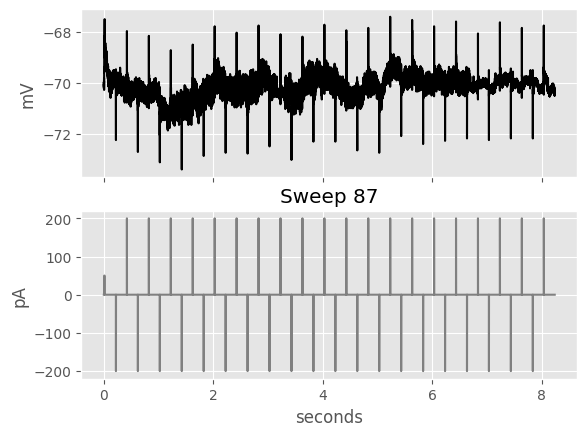

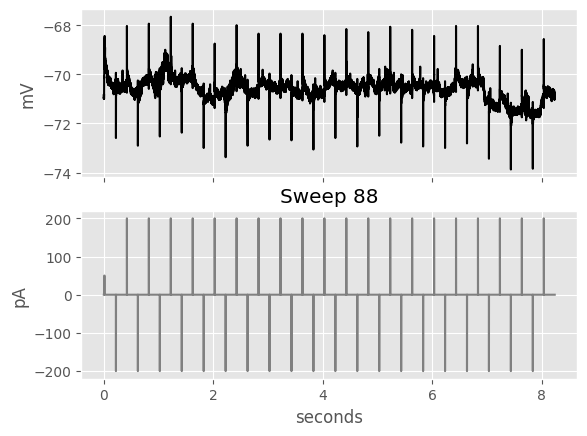

Sweep 89 does not exist.
Sweep 90 does not exist.
Sweep 91 does not exist.
Sweep 92 does not exist.


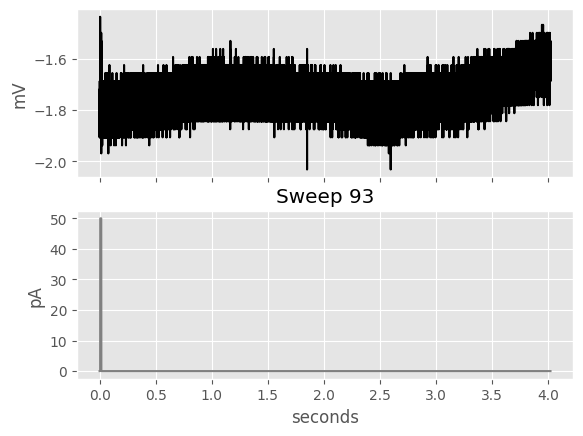

Sweep 94 does not exist.
Sweep 95 does not exist.
Sweep 96 does not exist.
Sweep 97 does not exist.
Sweep 98 does not exist.
Sweep 99 does not exist.
Sweep 100 does not exist.


In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a dataset named `data_set`

# Define the range of sweep numbers you want to consider
start_sweep = 1
end_sweep = 100  # Adjust this according to your dataset

# Loop through the sweep numbers in the specified range
for sweep_number in range(start_sweep, end_sweep + 1):
    try:
        sweep_data = data_set.get_sweep(sweep_number)
        
        index_range = sweep_data["index_range"]
        i = sweep_data["stimulus"][0:index_range[1]+1] * 1e12  # Convert to pA
        v = sweep_data["response"][0:index_range[1]+1] * 1e3   # Convert to mV

        sampling_rate = sweep_data["sampling_rate"]  # in Hz
        t = np.arange(0, len(v)) * (1.0 / sampling_rate)

        plt.style.use('ggplot')
        fig, axes = plt.subplots(2, 1, sharex=True)
        axes[0].plot(t, v, color='black')
        axes[1].plot(t, i, color='gray')
        axes[0].set_ylabel("mV")
        axes[1].set_ylabel("pA")
        axes[1].set_xlabel("seconds")
        plt.title(f"Sweep {sweep_number}")
        plt.show()
    except KeyError:
        # Handle the case where the sweep number doesn't exist
        print(f"Sweep {sweep_number} does not exist.")

In [8]:
from allensdk.core.cell_types_cache import CellTypesCache
import os
from pathlib import Path
output_dir = '.'

# Instantiate the CellTypesCache instance.  The manifest_file argument
# tells it where to store the manifest, which is a JSON file that tracks
# file paths.  If you supply a relative path it will go into your
# current working directory
try:
    ctc = CellTypesCache(manifest_file=Path(output_dir) / 'manifest.json')
except:
    os.remove(Path(output_dir) / 'manifest.json')
    ctc = CellTypesCache(manifest_file=Path(output_dir) / 'manifest.json')
    
# this saves the NWB file to 'cell_types/specimen_464212183/ephys.nwb'
cell_specimen_id = 613468354
data_set = ctc.get_ephys_data(cell_specimen_id)

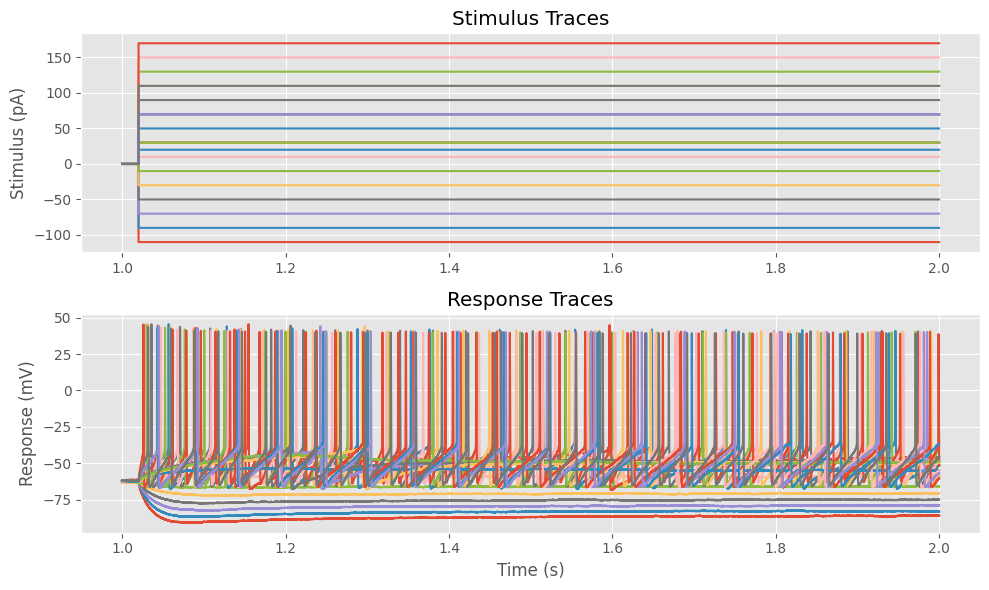

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a dataset named `data_set`

# Define the range of sweep numbers you want to consider
sweep_list = range(24, 49, 1)

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# Loop through the sweep numbers in the specified range
for sweep_number in sweep_list:
    try:
        sweep_data = data_set.get_sweep(sweep_number)
        
        index_range = sweep_data["index_range"]
        i = sweep_data["stimulus"][0:index_range[1]+1] * 1e12  # Convert to pA
        v = sweep_data["response"][0:index_range[1]+1] * 1e3   # Convert to mV

        sampling_rate = sweep_data["sampling_rate"]  # in Hz
        t = np.arange(0, len(v)) * (1.0 / sampling_rate)
        
        # Find the indices corresponding to the time range of interest (1 to 2 seconds)
        start_idx = int(sampling_rate)  # 1 second
        end_idx = int(2 * sampling_rate)  # 2 seconds

        # Plot stimulus in the first subplot for the specified time range
        axes[0].plot(t[start_idx:end_idx], i[start_idx:end_idx], label=f'Sweep {sweep_number} - Stimulus')

        # Plot response in the second subplot for the specified time range
        axes[1].plot(t[start_idx:end_idx], v[start_idx:end_idx], label=f'Sweep {sweep_number} - Response')

        #axes[0].plot(t, i, label=f'Sweep {sweep_number} - Stimulus')

        # Plot response in the second subplot
        #axes[1].plot(t, v, label=f'Sweep {sweep_number} - Response')

    except KeyError:
        # Handle the case where the sweep number doesn't exist
        print(f"Sweep {sweep_number} does not exist.")

# Configure subplot labels and legends
axes[0].set_ylabel("Stimulus (pA)")
axes[1].set_ylabel("Response (mV)")
axes[1].set_xlabel("Time (s)")
axes[0].set_title("Stimulus Traces")
axes[1].set_title("Response Traces")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [10]:
def count_spikes(TimeSeries,threshold):
    spike_indices = np.where(TimeSeries > threshold)[0]
    # Count the number of spikes
    num_spikes = len(spike_indices)    
    # Find sequences of consecutive numbers
    sequences = []
    current_sequence = []
    for i in range(1, len(spike_indices)):
        if spike_indices[i] == spike_indices[i - 1] + 1:
            current_sequence.append(spike_indices[i])
        else:
            sequences.append(current_sequence)
            current_sequence = [spike_indices[i]]
    # Add the last sequence
    sequences.append(current_sequence)
    # Count the number of sequences
    num_sequences = len(sequences)
    # Print the sequences and the number of sequences
    return num_sequences

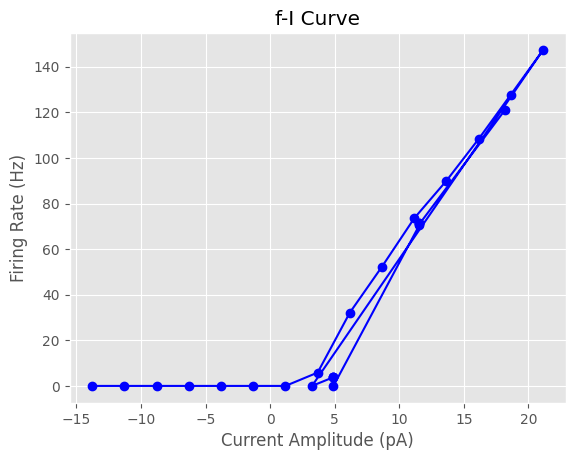

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a dataset named `data_set`

# Define the range of sweep numbers you want to consider
start_sweep = 1
end_sweep = 100  # Adjust this according to your dataset

# Lists to store current amplitudes and corresponding firing rates
current_amplitudes = []
firing_rates = []

sweep_list=range(24,49,1)

# Loop through the sweep numbers in the specified range
for sweep_number in sweep_list:
    try:
        sweep_data = data_set.get_sweep(sweep_number)
        
        index_range = sweep_data["index_range"]
        i = sweep_data["stimulus"][0:index_range[1]+1] * 1e12  # Convert to pA
        v = sweep_data["response"][0:index_range[1]+1] * 1e3   # Convert to mV

        # Calculate the firing rate as the number of spikes divided by the duration of the recording
        spike_threshold = 0  # Adjust this threshold based on spike detection criteria
        spikes = np.where(v > spike_threshold)[0]
        firing_rate = len(spikes) / (len(v) / sweep_data["sampling_rate"])

        # Get the current amplitude for this sweep
        current_amplitude = np.mean(i)  # You can calculate the mean current amplitude here
        
        # Store the current amplitude and firing rate
        current_amplitudes.append(current_amplitude)
        firing_rates.append(firing_rate)
        
    except KeyError:
        # Handle the case where the sweep number doesn't exist
        print(f"Sweep {sweep_number} does not exist.")

# Plot the f-I curve
plt.figure()
plt.plot(current_amplitudes, firing_rates, marker='o', linestyle='-', color='b')
plt.xlabel("Current Amplitude (pA)")
plt.ylabel("Firing Rate (Hz)")
plt.title("f-I Curve")
plt.grid(True)
plt.show()


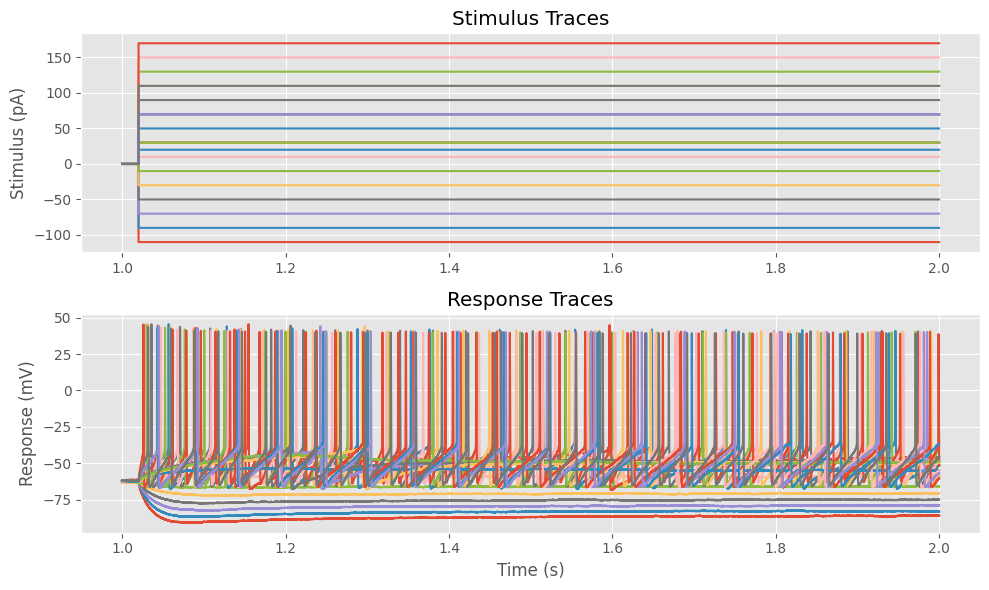

In [12]:
import allensdk.core.cell_types_cache as ctc
import numpy as np
import matplotlib.pyplot as plt

def get_dataset(id_specimen):
    """Gets the ephys dataset for the specified specimen ID."""
    ctc = CellTypesCache(manifest_file="./manifest.json")
    data_set = ctc.get_ephys_data(id_specimen)
    return data_set

#def get_dataset(id_specimen):
#    """Gets the ephys dataset for the specified specimen ID."""
#    cetc = ctc.CellTypesCache(manifest_file="./manifest.json")
#    data_set = cetc.get_ephys_data(id_specimen)

    return data_set

def plot_sweeps(sweep_list, data_set):
    """Plots the stimulus and response traces for the specified sweep numbers."""

    # Create a figure with two subplots
    fig, axes = plt.subplots(2, 1, figsize=(10, 6))

    # Loop through the sweep numbers in the specified range
    for sweep_number in sweep_list:
        try:
            sweep_data = data_set.get_sweep(sweep_number)

            index_range = sweep_data["index_range"]
            i = sweep_data["stimulus"][0:index_range[1]+1] * 1e12  # Convert to pA
            v = sweep_data["response"][0:index_range[1]+1] * 1e3   # Convert to mV

            sampling_rate = sweep_data["sampling_rate"]  # in Hz
            t = np.arange(0, len(v)) * (1.0 / sampling_rate)

            # Find the indices corresponding to the time range of interest (1 to 2 seconds)
            start_idx = int(sampling_rate)  # 1 second
            end_idx = int(2 * sampling_rate)  # 2 seconds

            # Plot stimulus in the first subplot for the specified time range
            axes[0].plot(t[start_idx:end_idx], i[start_idx:end_idx], label=f'Sweep {sweep_number} - Stimulus')

            # Plot response in the second subplot for the specified time range
            axes[1].plot(t[start_idx:end_idx], v[start_idx:end_idx], label=f'Sweep {sweep_number} - Response')
            
        except KeyError:
            # Handle the case where the sweep number doesn't exist
            print(f"Sweep {sweep_number} does not exist.")

    # Configure subplot labels and legends
    axes[0].set_ylabel("Stimulus (pA)")
    axes[1].set_ylabel("Response (mV)")
    axes[1].set_xlabel("Time (s)")
    axes[0].set_title("Stimulus Traces")
    axes[1].set_title("Response Traces")

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


id_specimen = 613468354
data_set = get_dataset(id_specimen)

sweep_list = range(24,49,1)
plot_sweeps(sweep_list, data_set)

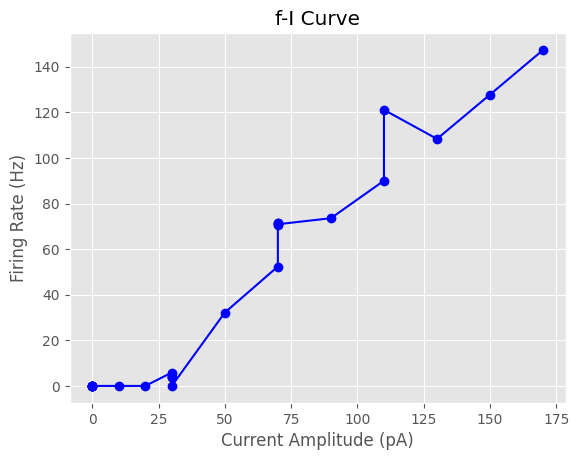

In [13]:
def get_fI_curve(data_set, sweep_list):
    """Gets the f-I curve for the specified sweep numbers."""

    # Define the range of sweep numbers you want to consider
    start_sweep = 1
    end_sweep = 100  # Adjust this according to your dataset

    # Lists to store current amplitudes and corresponding firing rates
    current_amplitudes = []
    firing_rates = []

    # Loop through the sweep numbers in the specified range
    for sweep_number in sweep_list:
        try:
            sweep_data = data_set.get_sweep(sweep_number)

            index_range = sweep_data["index_range"]
            i = sweep_data["stimulus"][0:index_range[1]+1] * 1e12  # Convert to pA
            v = sweep_data["response"][0:index_range[1]+1] * 1e3   # Convert to mV

            # Calculate the firing rate as the number of spikes divided by the duration of the recording
            
            spike_threshold = 0  # Adjust this threshold based on spike detection criteria
            spikes = np.where(v > spike_threshold)[0]
            firing_rate = len(spikes) / ((len(v) / sweep_data["sampling_rate"]))

            # Get the current amplitude for this sweep
            current_amplitude = max(i)
            #current_amplitude = np.mean(i)  # You can calculate the mean current amplitude here

            # Store the current amplitude and firing rate
            current_amplitudes.append(current_amplitude)
            firing_rates.append(firing_rate)
            
            
            
            # Sort the currents and firing rates together
            sorted_indices = sorted(range(len(current_amplitudes)), key=lambda p: current_amplitudes[p])
            current_amplitudes2 = [current_amplitudes[p] for p in sorted_indices]
            firing_rates2 = [firing_rates[p] for p in sorted_indices]
            
        except KeyError:
            # Handle the case where the sweep number doesn't exist
            print(f"Sweep {sweep_number} does not exist.")

    # Plot the f-I curve
    plt.figure()
    plt.plot(current_amplitudes2, firing_rates2, marker='o', linestyle='-', color='b')
    plt.xlabel("Current Amplitude (pA)")
    plt.ylabel("Firing Rate (Hz)")
    plt.title("f-I Curve")
    plt.grid(True)
    plt.show()

    #return current_amplitudes, firing_rates

sweep_list = range(24,49,1)
get_fI_curve(data_set, sweep_list)


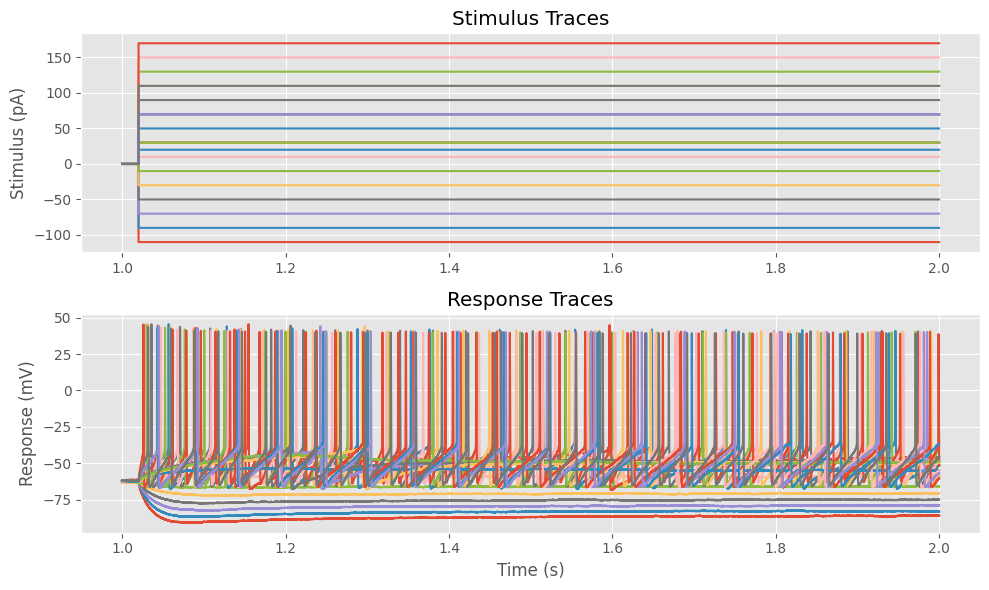

In [14]:
sweep_list = range(24,49,1)
plot_sweeps(sweep_list, data_set)

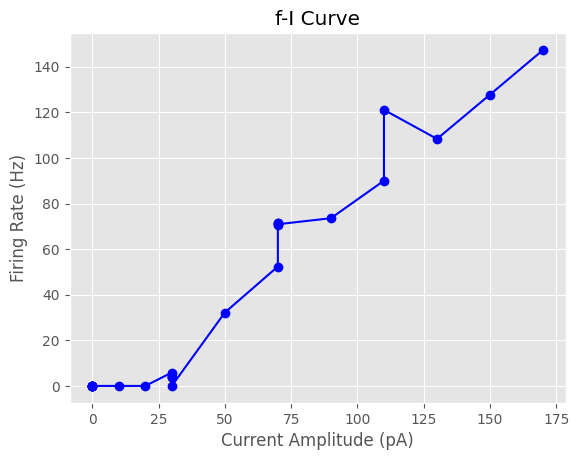

Sweep 28 does not exist.


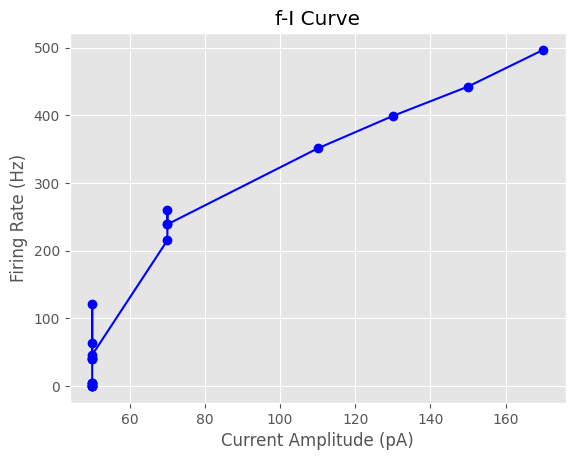

In [15]:
list_specimen = [613468354,571520445]
specimen_sweep_list = [range(24,49,1),range(18,40,1)]

for i in range(0,len(list_specimen)):
    data_set = get_dataset(list_specimen[i])
    sweep_list = specimen_sweep_list[i]
    #plot_sweeps(sweep_list, data_set)
    get_fI_curve(data_set, sweep_list)
    
plt.show()
    

In [16]:
from statistics import stdev

def get_fI_curve(data_set, sweep_list, color):
    """Gets the f-I curve for the specified sweep numbers."""

    # Get the current amplitudes and firing rates for each sweep
    current_amplitudes = []
    firing_rates = []
    for sweep_number in sweep_list:
        try:
            
            sweep_data = data_set.get_sweep(sweep_number)            
            index_range = sweep_data["index_range"]
            
            i = sweep_data["stimulus"][0:index_range[1]+1] * 1e12  # Convert to pA
            v = sweep_data["response"][0:index_range[1]+1] * 1e3   # Convert to mV   
            
            
            if i[int(1.25*sweep_data["sampling_rate"])] == i[int(1.75*sweep_data["sampling_rate"])] and i[int(1.9*sweep_data["sampling_rate"])] != 0:
            
                # Calculate the firing rate as the number of spikes divided by the duration of the recording
                spike_threshold = 0  # Adjust this threshold based on spike detection criteria
                #spikes = np.where(v > spike_threshold)[0]
                #spikes = count_spikes(v,spike_threshold)
                spikes = len(data_set.get_spike_times(sweep_number))
                #print(spikes)
            
                #firing_rate = ((len(spikes))/23) / (len(v) / sweep_data["sampling_rate"]) #Because the voltage pass two times the threshold in the depolarization 
                firing_rate = (spikes) / (len(v) / sweep_data["sampling_rate"]) #Because the voltage pass two times the threshold in the depolarization

                # Get the current amplitude for this sweep
                current_amplitude = max(i)  # You can calculate the mean current amplitude here
                
                # Store the current amplitude and firing rate
                current_amplitudes.append(current_amplitude)
                firing_rates.append(firing_rate)

                # Sort the currents and firing rates together
                sorted_indices = sorted(range(len(current_amplitudes)), key=lambda i: current_amplitudes[i])
                current_amplitudes = [current_amplitudes[i] for i in sorted_indices]
                firing_rates = [firing_rates[i] for i in sorted_indices]
                

                
            else:
                continue
                
        except KeyError:
            # Handle the case where the sweep number doesn't exist
            #print(f"Sweep {sweep_number} does not exist.")
            a=1
    # Plot the f-I curves
    plt.plot(current_amplitudes, firing_rates, marker='o', linestyle='-', color=color)
    plt.xlabel("Current Amplitude (pA)")
    plt.ylabel("Firing Rate (Hz)")
    plt.title("f-I Curve")
    plt.grid(True)
    
    return current_amplitudes, firing_rates

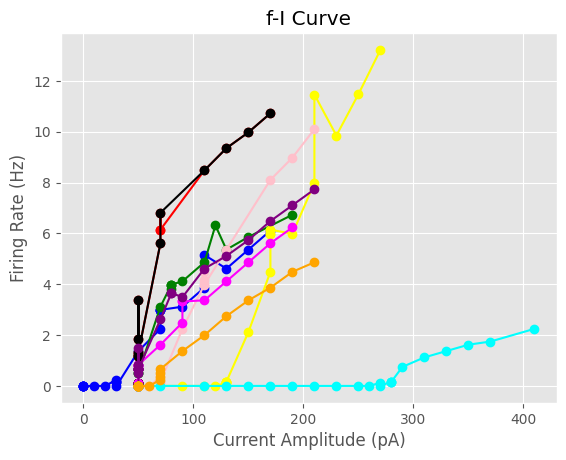

In [36]:
#List with epileptic patients
list_specimen = [613468354,571520445,571718621,571709783,571525618,571520445,571427524,567742660,541571148,541548139]
specimen_sweep_list = [range(24,49,1),range(18,40,1),range(24,51,1),range(23,53,1),range(28,53,1),range(18,38,1),range(36,60,1),range(28,58,1),range(37,69,1),range(26,46,1)]
colors = ["blue", "red", "green", "yellow","pink","black","magenta","purple","cyan","orange"]

for i in range(0,len(list_specimen)):
    data_set = get_dataset(list_specimen[i])
    sweep_list = specimen_sweep_list[i]
    get_fI_curve(data_set, sweep_list, colors[i])
    
plt.show()

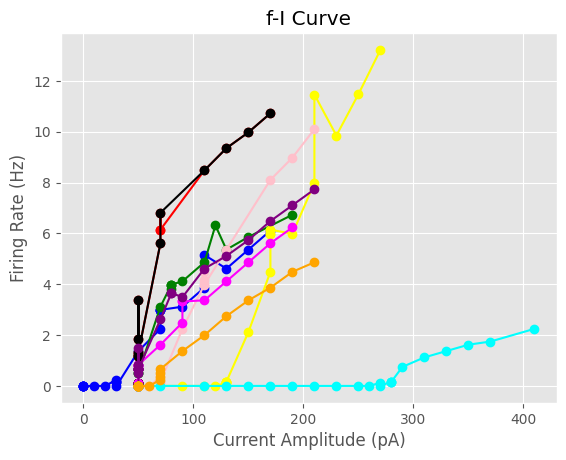

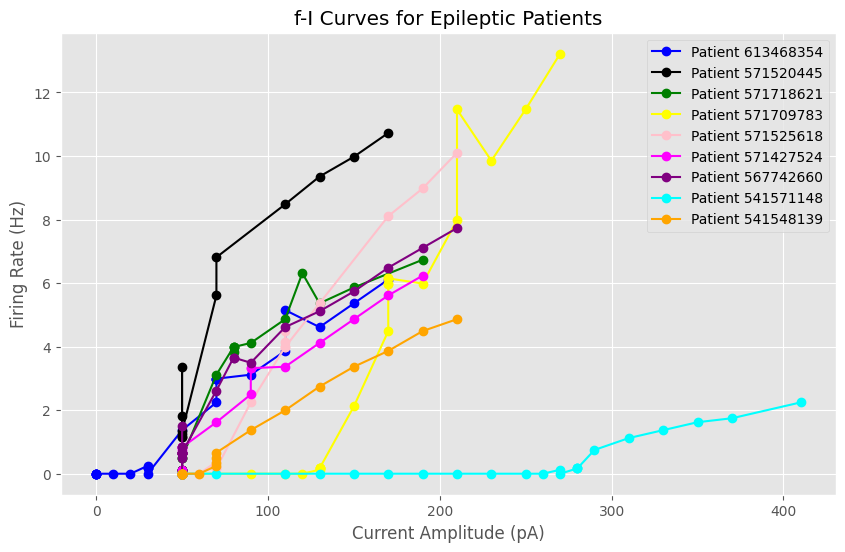

In [18]:
# Create a dictionary to store the results
fI_curve_results = {}

# List with epileptic patients
list_specimen = [613468354, 571520445, 571718621, 571709783, 571525618, 571520445, 571427524, 567742660, 541571148, 541548139]
specimen_sweep_list = [range(24, 49, 1), range(18, 40, 1), range(24, 51, 1), range(23, 53, 1), range(28, 53, 1), range(18, 38, 1), range(36, 60, 1), range(28, 58, 1), range(37, 69, 1), range(26, 46, 1)]
colors = ["blue", "red", "green", "yellow", "pink", "black", "magenta", "purple", "cyan", "orange"]

for i in range(0, len(list_specimen)):
    data_set = get_dataset(list_specimen[i])
    sweep_list = specimen_sweep_list[i]
    
    # Get the f-I curve data for the patient
    current_amplitudes, firing_rates = get_fI_curve(data_set, sweep_list, colors[i])
    
    # Store the results in the dictionary
    patient_id = list_specimen[i]
    fI_curve_results[patient_id] = {
        'current_amplitudes': current_amplitudes,
        'firing_rates': firing_rates,
        'color': colors[i]
    }

# Now, you have a dictionary (fI_curve_results) with patient IDs as keys
# and the corresponding current amplitudes, firing rates, and colors as values.

# You can access the results for a specific patient like this:
# results_for_patient = fI_curve_results[patient_id]
# current_amplitudes = results_for_patient['current_amplitudes']
# firing_rates = results_for_patient['firing_rates']

# To visualize the data, you can modify your plotting code as needed.
# This code will store the results in the dictionary and plot the f-I curves.
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for patient_id, results in fI_curve_results.items():
    current_amplitudes = results['current_amplitudes']
    firing_rates = results['firing_rates']
    color = results['color']
    
    plt.plot(current_amplitudes, firing_rates, marker='o', linestyle='-', color=color, label=f'Patient {patient_id}')

plt.xlabel("Current Amplitude (pA)")
plt.ylabel("Firing Rate (Hz)")
plt.title("f-I Curves for Epileptic Patients")
plt.grid(True)
plt.legend()
plt.show()


C:\Users\afcad\anaconda3\envs\py37\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
C:\Users\afcad\anaconda3\envs\py37\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


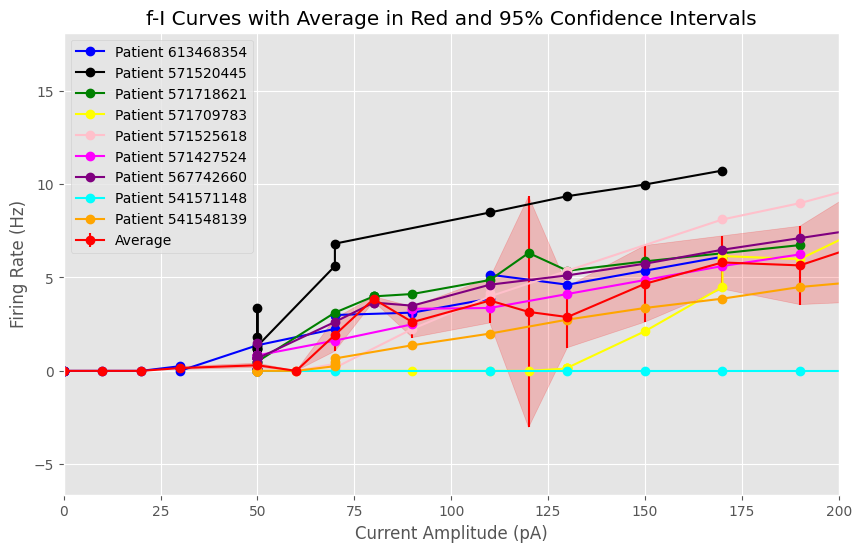

In [19]:
import matplotlib.pyplot as plt
from scipy import stats


# Initialize empty lists to store data
all_current_amplitudes = []
all_firing_rates = []

# Initialize a figure
plt.figure(figsize=(10, 6))

# Iterate through the patient data in the dictionary and plot individual f-I curves
for patient_id, patient_data in fI_curve_results.items():
    current_amplitudes = patient_data['current_amplitudes']
    firing_rates = patient_data['firing_rates']
    color = patient_data['color']
    
    # Plot individual f-I curves
    plt.plot(current_amplitudes, firing_rates, marker='o', linestyle='-', color=color, label=f'Patient {patient_id}')
    
    # Extend the lists with the data from the current patient
    all_current_amplitudes.extend(current_amplitudes)
    all_firing_rates.extend(firing_rates)

# Convert lists to NumPy arrays
all_current_amplitudes = np.array(all_current_amplitudes)
all_firing_rates = np.array(all_firing_rates)

# Calculate the average firing rate per current amplitude
unique_current_amplitudes = np.unique(all_current_amplitudes)
average_firing_rates = []

for amp in unique_current_amplitudes:
    mask = (all_current_amplitudes == amp)
    avg_rate = np.mean(all_firing_rates[mask])
    average_firing_rates.append(avg_rate)

# Calculate the standard error of the mean (SEM) for each current amplitude
sem_values = []
for amp in unique_current_amplitudes:
    mask = (all_current_amplitudes == amp)
    sem = stats.sem(all_firing_rates[mask])
    sem_values.append(sem)

# Calculate the 95% confidence interval for each data point
confidence_intervals = [1.96 * sem for sem in sem_values]  # 1.96 is the Z-score for a 95% confidence interval

# Plot the average firing rate in red with 95% confidence intervals
plt.errorbar(
    unique_current_amplitudes,
    average_firing_rates,
    yerr=confidence_intervals,
    marker='o',
    linestyle='-',
    color='red',
    label='Average',
)

# Fill the area between the upper and lower confidence intervals
plt.fill_between(
    unique_current_amplitudes,
    np.array(average_firing_rates) - np.array(confidence_intervals),
    np.array(average_firing_rates) + np.array(confidence_intervals),
    color='red',
    alpha=0.2,
)

plt.xlabel("Current Amplitude (pA)")
plt.ylabel("Firing Rate (Hz)")
plt.title("f-I Curves with Average in Red and 95% Confidence Intervals")
# Set x-axis limits to 200
plt.xlim([0, 200])
plt.grid(True)
plt.legend()
plt.show()


# Trying to convert into a csv file

In [37]:
import numpy as np
import csv
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.ephys.ephys_extractor import EphysSweepFeatureExtractor

def get_dataset(id_specimen):
    """Gets the ephys dataset for the specified specimen ID."""
    ctc = CellTypesCache(manifest_file="./manifest.json")
    data_set = ctc.get_ephys_data(id_specimen)
    return data_set

def save_to_csv(filename, times, stimulus, response):
    with open(filename, mode='w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["Time (s)", "Stimulus (pA)", "Response (mV)"])
        for t, stim, resp in zip(times, stimulus, response):
            writer.writerow([t, stim, resp])

def plot_and_save_sweeps(sweep_list, data_set):
    combined_times = []
    combined_stimulus = []
    combined_response = []

    for sweep_number in sweep_list:
        try:
            sweep_data = data_set.get_sweep(sweep_number)
            index_range = sweep_data["index_range"]
            i = sweep_data["stimulus"][0:index_range[1]+1] * 1e12  # Convert to pA
            v = sweep_data["response"][0:index_range[1]+1] * 1e3   # Convert to mV

            sampling_rate = sweep_data["sampling_rate"]  # in Hz
            t = np.arange(0, len(v)) * (1.0 / sampling_rate)

            start_idx = int(sampling_rate)  # 1 second
            end_idx = int(2 * sampling_rate)  # 2 seconds

            combined_times.extend(t[start_idx:end_idx])
            combined_stimulus.extend(i[start_idx:end_idx])
            combined_response.extend(v[start_idx:end_idx])

        except KeyError:
            print(f"Sweep {sweep_number} does not exist.")

    save_to_csv("combined_sweeps.csv", combined_times, combined_stimulus, combined_response)

id_specimen = 613468354
data_set = get_dataset(id_specimen)

sweep_list = range(24, 49, 1)
plot_and_save_sweeps(sweep_list, data_set)


525011903
528642047
537256313
519832676
596020931
569095789
576095991
545608578
561467633
528706755
530055374
531520637
530097064
488418919
616647103
567776248
542143598
531520401
527942865
596049209
529807751
539563223
489308885
508280385
601927090
517673596
595999306
528042185
488386626
528638057
571427524
601950719
508282493
529988200
576132767
571709783
587719226
562381326
528612139
571718621
531517518
613333217
508281653
508421103
569823971
571508482
561432315
530062215
527891102
539640410
541536216
519849529
614230805
488386431
528631988
528601797
488400701
508413678
614635228
643572206
529908238
531526662
508410761
643582610
530062268
611617700
537307503
508285405
548473051
561464809
525018757
571483807
569101823
571435969
548421866
539540199
531529716
539563673
528609885
529856350
545193484
508309649
528617195
587710671
571517139
528631714
561465305
508390405
526816192
571471295
541566142
587770251
614197612
528697733
528011097
508390609
527901472
548434716
528734156
528038990


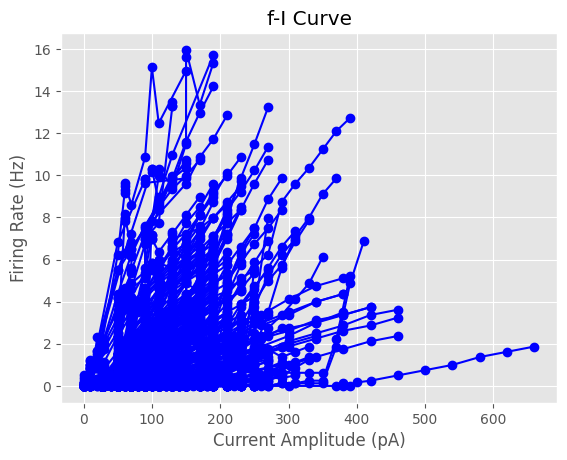

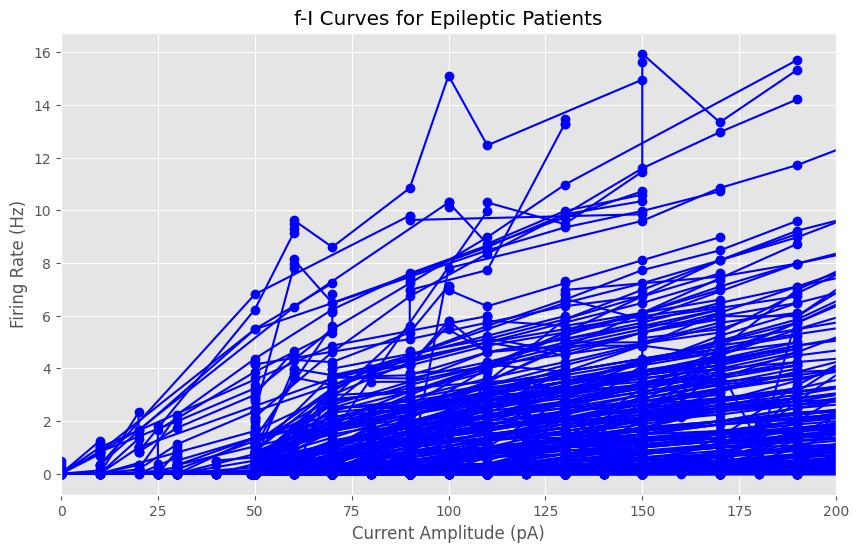

In [38]:
# Create a dictionary to store the results with data from layer 3 
fI_curve_results = {}

# List with epileptic patients
#list_specimen = [601958555, 595562635, 587770251, 587762000, 571735073, 571721440, 571691416, 571624971, 571624532, 571520908, 571517193,571516327,571508482,571483807,571450870,571430815,571426284,569844159,569820130,562381326]
list_specimen = id_list.to_list()
specimen_sweep_list = [range(0, 50, 1)] * len(list_specimen)
#colors = ["blue", "red", "green", "yellow", "pink", "black", "magenta", "purple", "cyan", "orange"]
colors = ["blue"] * len(list_specimen)
for i in range(0, len(list_specimen)):
    print(list_specimen[i])
    data_set = get_dataset(list_specimen[i])
    sweep_list = specimen_sweep_list[i]
    
    # Get the f-I curve data for the patient
    current_amplitudes, firing_rates = get_fI_curve(data_set, sweep_list, colors[i])
    
    # Store the results in the dictionary
    patient_id = list_specimen[i]
    fI_curve_results[patient_id] = {
        'current_amplitudes': current_amplitudes,
        'firing_rates': firing_rates,
        'color': colors[i]
    }

# Now, you have a dictionary (fI_curve_results) with patient IDs as keys
# and the corresponding current amplitudes, firing rates, and colors as values.

# You can access the results for a specific patient like this:
# results_for_patient = fI_curve_results[patient_id]
# current_amplitudes = results_for_patient['current_amplitudes']
# firing_rates = results_for_patient['firing_rates']

# To visualize the data, you can modify your plotting code as needed.
# This code will store the results in the dictionary and plot the f-I curves.
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for patient_id, results in fI_curve_results.items():
    current_amplitudes = results['current_amplitudes']
    firing_rates = results['firing_rates']
    color = results['color']
    
    plt.plot(current_amplitudes, firing_rates, marker='o', linestyle='-', color=color, label=f'Patient {patient_id}')

plt.xlabel("Current Amplitude (pA)")
plt.ylabel("Firing Rate (Hz)")
plt.title("f-I Curves for Epileptic Patients")
plt.xlim([0, 200])
plt.grid(True)
plt.show()



C:\Users\afcad\anaconda3\envs\py37\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
C:\Users\afcad\anaconda3\envs\py37\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


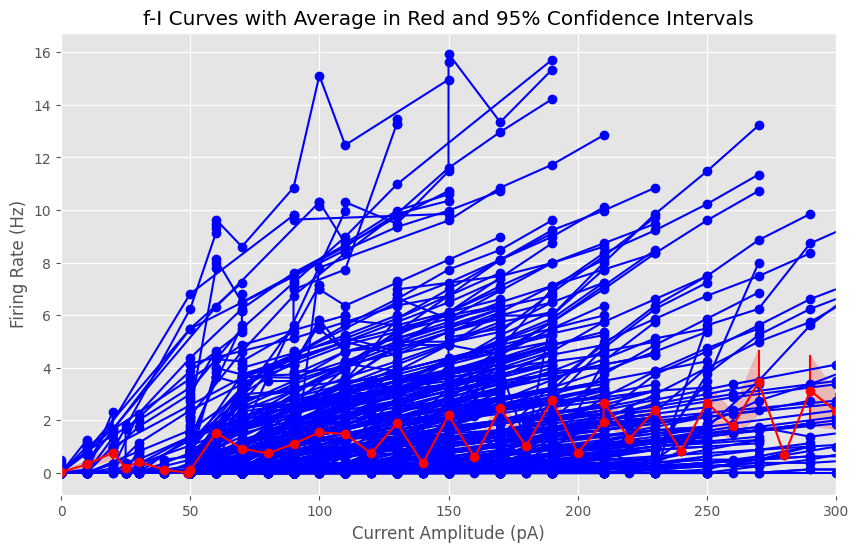

In [39]:
import matplotlib.pyplot as plt

# Initialize empty lists to store data
all_current_amplitudes = []
all_firing_rates = []

# Initialize a figure
plt.figure(figsize=(10, 6))

# Iterate through the patient data in the dictionary and plot individual f-I curves
for patient_id, patient_data in fI_curve_results.items():
    current_amplitudes = patient_data['current_amplitudes']
    firing_rates = patient_data['firing_rates']
    color = patient_data['color']
    
    # Plot individual f-I curves
    plt.plot(current_amplitudes, firing_rates, marker='o', linestyle='-', color=color, label=f'Patient {patient_id}')
    
    # Extend the lists with the data from the current patient
    all_current_amplitudes.extend(current_amplitudes)
    all_firing_rates.extend(firing_rates)

# Convert lists to NumPy arrays
all_current_amplitudes = np.array(all_current_amplitudes)
all_firing_rates = np.array(all_firing_rates)

# Calculate the average firing rate per current amplitude
unique_current_amplitudes = np.unique(all_current_amplitudes)
average_firing_rates = []

for amp in unique_current_amplitudes:
    mask = (all_current_amplitudes == amp)
    avg_rate = np.mean(all_firing_rates[mask])
    average_firing_rates.append(avg_rate)

# Calculate the standard error of the mean (SEM) for each current amplitude
sem_values = []
for amp in unique_current_amplitudes:
    mask = (all_current_amplitudes == amp)
    sem = stats.sem(all_firing_rates[mask])
    sem_values.append(sem)

# Calculate the 95% confidence interval for each data point
confidence_intervals = [1.99 * sem for sem in sem_values]  # 1.96 is the Z-score for a 95% confidence interval

# Plot the average firing rate in red with 95% confidence intervals
plt.errorbar(
    unique_current_amplitudes,
    average_firing_rates,
    yerr=confidence_intervals,
    marker='o',
    linestyle='-',
    color='red',
    label='Average',
)

# Fill the area between the upper and lower confidence intervals
plt.fill_between(
    unique_current_amplitudes,
    np.array(average_firing_rates) - np.array(confidence_intervals),
    np.array(average_firing_rates) + np.array(confidence_intervals),
    color='red',
    alpha=0.2,
)

plt.xlabel("Current Amplitude (pA)")
plt.ylabel("Firing Rate (Hz)")
plt.title("f-I Curves with Average in Red and 95% Confidence Intervals")
# Set x-axis limits to 200
plt.xlim([0,300])
plt.grid(True)
plt.show()

In [40]:
#Import the "Cell Types Cache" from the AllenSDK core package
from allensdk.core.cell_types_cache import CellTypesCache

#Import CellTypesApi, which will allow us to query the database.
from allensdk.api.queries.cell_types_api import CellTypesApi

# We'll then initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

human_cells = ctc.get_cells(species=[CellTypesApi.HUMAN])
human_cells

import pandas as pd
human_df = pd.DataFrame(human_cells)
human_df_filtered = human_df[(human_df["disease_state"] == "epilepsy") & (human_df["structure_area_abbrev"] == "MTG")  & (human_df["structure_layer_name"] == '3') & (human_df["dendrite_type"] == "spiny") &(human_df["apical"]=='intact')&(human_df["reconstruction_type"]=='full')]

id_list = human_df_filtered["id"]
human_df_filtered

reporter_status     cell_soma_location       species         id  \
32             None  [325.0, 257.0, 102.0]  Homo Sapiens  508282493   
47             None   [70.0, 260.0, 111.0]  Homo Sapiens  530062215   
71             None   [72.0, 263.0, 103.0]  Homo Sapiens  571483807   
155            None   [313.0, 280.0, 94.0]  Homo Sapiens  569820130   
171            None    [72.0, 257.0, 90.0]  Homo Sapiens  571624532   
180            None  [325.0, 257.0, 102.0]  Homo Sapiens  508378649   
195            None   [322.0, 255.0, 92.0]  Homo Sapiens  537261100   
206            None    [72.0, 257.0, 90.0]  Homo Sapiens  571691416   
208            None    [72.0, 257.0, 90.0]  Homo Sapiens  571735073   
235            None    [72.0, 257.0, 90.0]  Homo Sapiens  571624971   
240            None    [73.0, 260.0, 93.0]  Homo Sapiens  529845713   
250            None    [88.0, 272.0, 74.0]  Homo Sapiens  541540569   
251            None  [325.0, 258.0, 104.0]  Homo Sapiens  508305938   
256            None   [322.0, 255.0, 92.0]  Homo Sapiens  537266147   
276            None    [88.0, 272.0, 74.0]  Homo Sapiens  541545716   
303            None  [325.0, 257.0, 102.0]  Homo Sapiens  508279351   
313            None   [322.0, 255.0, 92.0]  Homo Sapiens  537297470   
315            None    [83.0, 268.0, 81.0]  Homo Sapiens  571430815   
327            None   [85.0, 271.0, 103.0]  Homo Sapiens  520454345   
333            None   [72.0, 263.0, 103.0]  Homo Sapiens  571450870   
339            None   [85.0, 271.0, 103.0]  Homo Sapiens  520631294   
344            None   [322.0, 255.0, 92.0]  Homo Sapiens  537218493   
368            None   [70.0, 260.0, 108.0]  Homo Sapiens  528623840   
372            None   [70.0, 260.0, 111.0]  Homo Sapiens  529878215   
396            None   [317.0, 268.0, 88.0]  Homo Sapiens  539542640   
399            None   [322.0, 255.0, 92.0]  Homo Sapiens  537313600   
400            None   [313.0, 280.0, 94.0]  Homo Sapiens  569844159   
407            None  [325.0, 257.0, 102.0]  Homo Sapiens  508298270   
408            None   [312.0, 280.0, 89.0]  Homo Sapiens  545612828   

                       name structure_layer_name  structure_area_id  \
32      H16.06.004.01.04.03                    3              12141   
47   H16.06.010.01.03.14.02                    3              12141   
71      H17.06.005.12.15.05                    3              12141   
155     H17.03.002.11.03.01                    3              12141   
171     H17.06.006.11.08.02                    3              12141   
180     H16.06.004.01.05.02                    3              12141   
195     H16.03.006.01.04.02                    3              12141   
206     H17.06.006.11.09.04                    3              12141   
208     H17.06.006.11.09.08                    3              12141   
235     H17.06.006.11.10.01                    3              12141   
240  H16.06.010.01.02.18.02                    3              12141   
250  H16.03.007.01.01.03.02                    3              12141   
251     H16.06.004.02.10.01                    3              12141   
256     H16.03.006.01.09.02                    3              12141   
276  H16.03.007.01.01.04.03                    3              12141   
303     H16.06.004.01.04.01                    3              12141   
313     H16.03.006.01.04.03                    3              12141   
315     H17.06.005.13.05.02                    3              12141   
327     H16.03.002.01.06.01                    3              12141   
333     H17.06.005.12.15.03                    3              12141   
339     H16.03.002.01.03.03                    3              12141   
344     H16.03.006.01.03.01                    3              12141   
368  H16.06.009.01.01.03.05                    3              12141   
372  H16.06.010.01.03.05.03                    3              12141   
396  H16.06.011.01.01.10.04                    3              12141   
399     H16.03.006.01.03.04

In [ ]:
#Import the "Cell Types Cache" from the AllenSDK core package
from allensdk.core.cell_types_cache import CellTypesCache

#Import CellTypesApi, which will allow us to query the database.
from allensdk.api.queries.cell_types_api import CellTypesApi

# We'll then initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')
human_cells = ctc.get_cells(species=[CellTypesApi.HUMAN])
human_cells

import pandas as pd
human_df = pd.DataFrame(human_cells)
human_df_filtered = human_df[(human_df["disease_state"] == "epilepsy") & (human_df["structure_area_abbrev"] == "MTG")  & (human_df["structure_layer_name"] == '3') & (human_df["dendrite_type"] == "spiny")]

id_list = human_df_filtered["id"]
human_df_filtered

In [41]:
#Import the "Cell Types Cache" from the AllenSDK core package
from allensdk.core.cell_types_cache import CellTypesCache

#Import CellTypesApi, which will allow us to query the database.
from allensdk.api.queries.cell_types_api import CellTypesApi

# We'll then initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

human_cells = ctc.get_cells(species=[CellTypesApi.HUMAN])
human_cells

import pandas as pd
human_df = pd.DataFrame(human_cells)
human_df_filtered = human_df[(human_df["disease_state"] == "epilepsy") & (human_df["structure_area_abbrev"] == "MTG") & (human_df["dendrite_type"] == "spiny")]

id_list = human_df_filtered["id"]
human_df_filtered

reporter_status     cell_soma_location       species         id  \
2              None   [322.0, 255.0, 92.0]  Homo Sapiens  537256313   
3              None    [79.0, 273.0, 91.0]  Homo Sapiens  519832676   
7              None   [312.0, 280.0, 89.0]  Homo Sapiens  545608578   
8              None    [79.0, 273.0, 86.0]  Homo Sapiens  561467633   
9              None   [70.0, 260.0, 108.0]  Homo Sapiens  528706755   
..              ...                    ...           ...        ...   
404            None    [69.0, 254.0, 96.0]  Homo Sapiens  528636794   
407            None  [325.0, 257.0, 102.0]  Homo Sapiens  508298270   
408            None   [312.0, 280.0, 89.0]  Homo Sapiens  545612828   
409            None   [67.0, 256.0, 110.0]  Homo Sapiens  527952884   
412            None   [68.0, 252.0, 106.0]  Homo Sapiens  601958555   

                       name structure_layer_name  structure_area_id  \
2       H16.03.006.01.05.02                    4              12141   
3       H16.03.001.01.09.01                    3              12141   
7       H16.03.010.13.06.01                    3              12141   
8       H16.06.013.12.08.05                    3              12141   
9    H16.06.009.01.01.15.01                    2              12141   
..                      ...                  ...                ...   
404  H16.06.009.01.02.03.01                    5              12141   
407     H16.06.004.01.04.05                    3              12141   
408     H16.03.010.13.05.03                    3              12141   
409     H16.06.008.01.31.06                    4              12141   
412     H17.03.010.11.13.06                    4              12141   

    structure_area_abbrev transgenic_line dendrite_type     apical  \
2                     MTG                         spiny  truncated   
3                     MTG                         spiny  truncated   
7                     MTG                         spiny     intact   
8                     MTG                         spiny  truncated   
9                     MTG                         spiny     intact   
..                    ...             ...           ...        ...   
404                   MTG                         spiny  truncated   
407                   MTG                         spiny     intact   
408                   MTG                         spiny     intact   
409                   MTG                         spiny  truncated   
412                   MTG                         spiny     intact   

    reconstruction_type disease_state   donor_id structure_hemisphere  \
2                  None      epilepsy  536912860                right   
3                  full      epilepsy  518641172                 left   
7                  None      epilepsy  545510854                right   
8                  None      epilepsy  561414332                 left   
9         dendrite-only      epilepsy  528574320                 left   
..                  ...           ...        ...                  ...   
404                full      epilepsy  528574320                 left   
407                full      epilepsy  504921484                right   
408                full      epilepsy  545510854                right   
409                full      epilepsy  527747035                 left   
412                full      epilepsy  601901227                 left   

     normalized_depth  
2                 NaN  
3            0.290951  
7                 NaN  
8                 NaN  
9            0.134667  
..                ...  
404          0.558692  
407          0.095478  
408          0.223071  
409          0.576931  
412          0.514498  

[232 rows x 16 columns]

537256313
519832676
545608578
561467633
528706755
530055374
488418919
616647103
567776248
542143598
527942865
539563223
489308885
508280385
528042185
528638057
601950719
508282493
587719226
562381326
528612139
613333217
508421103
569823971
571508482
530062215
527891102
519849529
614230805
528631988
528601797
488400701
508413678
614635228
508410761
537307503
508285405
561464809
571483807
539540199
539563673
528609885
529856350
508309649
528617195
528631714
508390405
571471295
541566142
587770251
614197612
528697733
508390609
527901472
528038990
520470950
567731428
569867780
528638602
569869510
611764247
613442532
542086000
571500474
614659629
528637071
567763632
611823070
520636424
508376177
539547437
541551362
539661667
527946361
539542218
528671590
569820026
571450845
542131227
587762000
541541635
539578371
569820130
528758496
539659702
587784061
505689242
528605746
541548139
528638213
508400454
571624532
520470657
508372969
528617665
508400049
508378649
508427757
571485304
528019077


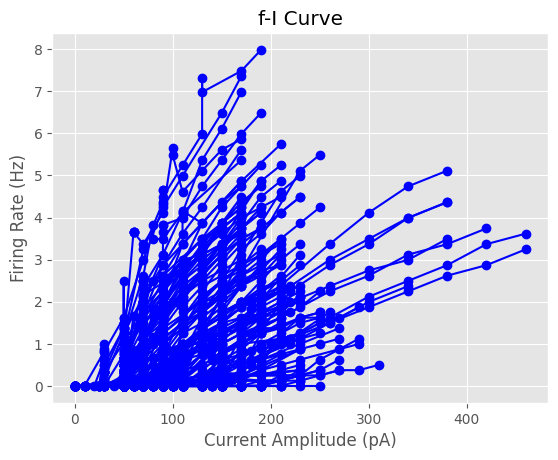

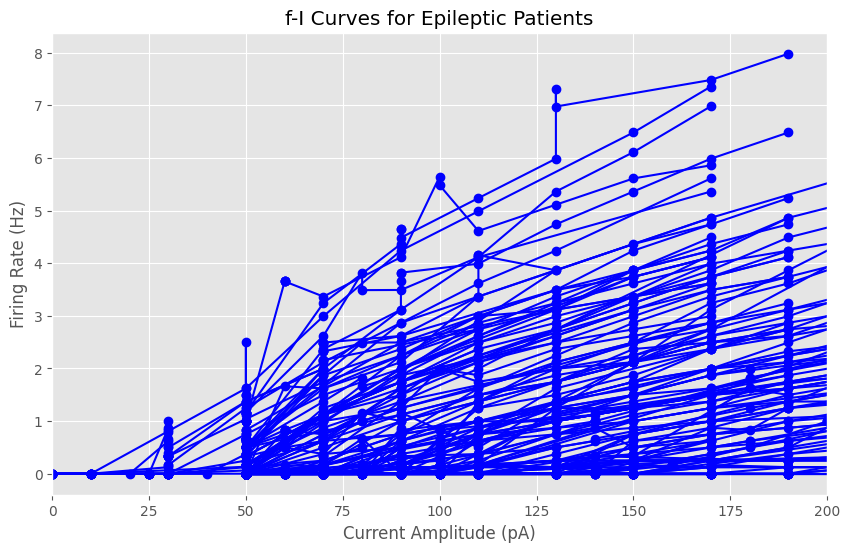

In [42]:
# Create a dictionary to store the results with data from layer 2 
fI_curve_results = {}

# List with epileptic patients
#list_specimen = [601958555, 595562635, 587770251, 587762000, 571735073, 571721440, 571691416, 571624971, 571624532, 571520908, 571517193,571516327,571508482,571483807,571450870,571430815,571426284,569844159,569820130,562381326]
list_specimen = id_list.to_list()
specimen_sweep_list = [range(0, 50, 1)] * len(list_specimen)
#colors = ["blue", "red", "green", "yellow", "pink", "black", "magenta", "purple", "cyan", "orange"]
colors = ["blue"] * len(list_specimen)
for i in range(0, len(list_specimen)):
    print(list_specimen[i])
    data_set = get_dataset(list_specimen[i])
    sweep_list = specimen_sweep_list[i]
    
    # Get the f-I curve data for the patient
    current_amplitudes, firing_rates = get_fI_curve(data_set, sweep_list, colors[i])
    
    # Store the results in the dictionary
    patient_id = list_specimen[i]
    fI_curve_results[patient_id] = {
        'current_amplitudes': current_amplitudes,
        'firing_rates': firing_rates,
        'color': colors[i]
    }

# Now, you have a dictionary (fI_curve_results) with patient IDs as keys
# and the corresponding current amplitudes, firing rates, and colors as values.

# You can access the results for a specific patient like this:
# results_for_patient = fI_curve_results[patient_id]
# current_amplitudes = results_for_patient['current_amplitudes']
# firing_rates = results_for_patient['firing_rates']

# To visualize the data, you can modify your plotting code as needed.
# This code will store the results in the dictionary and plot the f-I curves.
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for patient_id, results in fI_curve_results.items():
    current_amplitudes = results['current_amplitudes']
    firing_rates = results['firing_rates']
    color = results['color']
    
    plt.plot(current_amplitudes, firing_rates, marker='o', linestyle='-', color=color, label=f'Patient {patient_id}')

plt.xlabel("Current Amplitude (pA)")
plt.ylabel("Firing Rate (Hz)")
plt.title("f-I Curves for Epileptic Patients")
# Set x-axis limits to 200
plt.xlim([0, 200])
plt.grid(True)
plt.show()

C:\Users\afcad\anaconda3\envs\py37\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
C:\Users\afcad\anaconda3\envs\py37\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


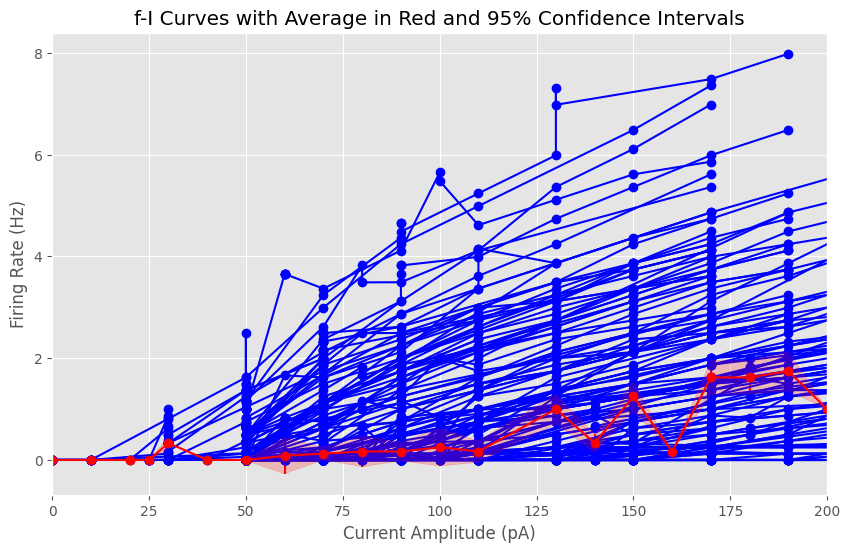

In [64]:
import matplotlib.pyplot as plt
from scipy import stats

# Initialize empty lists to store data
all_current_amplitudes = []
all_firing_rates = []

# Initialize a figure
plt.figure(figsize=(10, 6))

# Iterate through the patient data in the dictionary and plot individual f-I curves
for patient_id, patient_data in fI_curve_results.items():
    current_amplitudes = patient_data['current_amplitudes']
    firing_rates = patient_data['firing_rates']
    color = patient_data['color']
    
    # Plot individual f-I curves
    plt.plot(current_amplitudes, np.array(firing_rates), marker='o', linestyle='-', color=color, label=f'Patient {patient_id}')
    
    # Extend the lists with the data from the current patient
    all_current_amplitudes.extend(current_amplitudes)
    all_firing_rates.extend(firing_rates)

# Convert lists to NumPy arrays
all_current_amplitudes = np.array(all_current_amplitudes)
all_firing_rates = np.array(all_firing_rates)

# Calculate the average firing rate per current amplitude
unique_current_amplitudes = np.unique(all_current_amplitudes)
average_firing_rates = []

for amp in unique_current_amplitudes:
    mask = (all_current_amplitudes == amp)
    avg_rate = np.median(all_firing_rates[mask])
    average_firing_rates.append(avg_rate)

# Calculate the standard error of the mean (SEM) for each current amplitude
sem_values = []
for amp in unique_current_amplitudes:
    mask = (all_current_amplitudes == amp)
    sem = stats.sem(all_firing_rates[mask])
    sem_values.append(sem)

# Calculate the 95% confidence interval for each data point
confidence_intervals = np.array([1.96 * sem for sem in sem_values])  # 1.96 is the Z-score for a 95% confidence interval

# Plot the average firing rate in red with 95% confidence intervals
plt.errorbar(
    unique_current_amplitudes,
    np.array(average_firing_rates),
    yerr=confidence_intervals,
    marker='o',
    linestyle='-',
    color='red',
    label='Average',
)

# Fill the area between the upper and lower confidence intervals
plt.fill_between(
    unique_current_amplitudes,
    np.array(average_firing_rates) - np.array(confidence_intervals),
    np.array(average_firing_rates) + np.array(confidence_intervals),
    color='red',
    alpha=0.2,
    zorder=3
)

plt.xlabel("Current Amplitude (pA)")
plt.ylabel("Firing Rate (Hz)")
plt.title("f-I Curves with Average in Red and 95% Confidence Intervals")
# Set x-axis limits to 200

plt.grid(True)
plt.xlim([0,200])
plt.show()

C:\Users\afcad\anaconda3\envs\py37\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
C:\Users\afcad\anaconda3\envs\py37\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


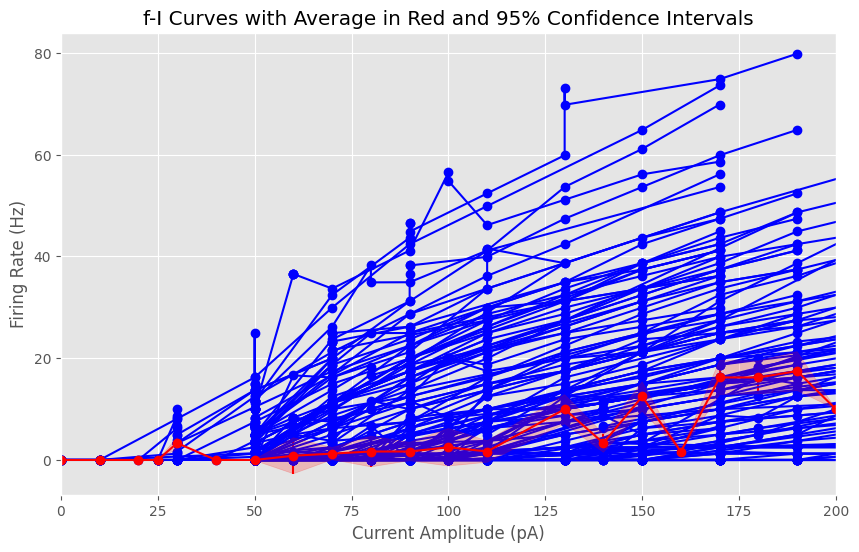

In [63]:
import matplotlib.pyplot as plt
from scipy import stats

# Initialize empty lists to store data
all_current_amplitudes = []
all_firing_rates = []

# Initialize a figure
plt.figure(figsize=(10, 6))

# Iterate through the patient data in the dictionary and plot individual f-I curves
for patient_id, patient_data in fI_curve_results.items():
    current_amplitudes = patient_data['current_amplitudes']
    firing_rates = patient_data['firing_rates']
    color = patient_data['color']
    
    # Plot individual f-I curves
    plt.plot(current_amplitudes, np.array(firing_rates)*10, marker='o', linestyle='-', color=color, label=f'Patient {patient_id}')
    
    # Extend the lists with the data from the current patient
    all_current_amplitudes.extend(current_amplitudes)
    all_firing_rates.extend(firing_rates)

# Convert lists to NumPy arrays
all_current_amplitudes = np.array(all_current_amplitudes)
all_firing_rates = np.array(all_firing_rates)

# Calculate the average firing rate per current amplitude
unique_current_amplitudes = np.unique(all_current_amplitudes)
average_firing_rates = []

for amp in unique_current_amplitudes:
    mask = (all_current_amplitudes == amp)
    avg_rate = np.median(all_firing_rates[mask])
    average_firing_rates.append(avg_rate)

# Calculate the standard error of the mean (SEM) for each current amplitude
sem_values = []
for amp in unique_current_amplitudes:
    mask = (all_current_amplitudes == amp)
    sem = stats.sem(all_firing_rates[mask])
    sem_values.append(sem)

# Calculate the 95% confidence interval for each data point
confidence_intervals = np.array([1.96 * sem for sem in sem_values])*10  # 1.96 is the Z-score for a 95% confidence interval

# Plot the average firing rate in red with 95% confidence intervals
plt.errorbar(
    unique_current_amplitudes,
    np.array(average_firing_rates)*10,
    yerr=confidence_intervals,
    marker='o',
    linestyle='-',
    color='red',
    label='Average',
)

# Fill the area between the upper and lower confidence intervals
plt.fill_between(
    unique_current_amplitudes,
    np.array(average_firing_rates)*10 - np.array(confidence_intervals),
    np.array(average_firing_rates)*10 + np.array(confidence_intervals),
    color='red',
    alpha=0.2,
    zorder=3
)

plt.xlabel("Current Amplitude (pA)")
plt.ylabel("Firing Rate (Hz)")
plt.title("f-I Curves with Average in Red and 95% Confidence Intervals")
# Set x-axis limits to 200

plt.grid(True)
plt.xlim([0,200])
plt.show()

In [45]:
# Save the calculated data to a CSV file
csv_filename = 'average_firing_ratessssss.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    
    # Write header
    csv_writer.writerow(['Current Amplitude (pA)', 'Average Firing Rate (Hz)', 'Lower CI', 'Upper CI'])
    
    # Write data
    for amp, avg_rate, ci in zip(unique_current_amplitudes, average_firing_rates, confidence_intervals):
        csv_writer.writerow([amp, avg_rate, avg_rate - ci, avg_rate + ci])

print(f'Data written to {csv_filename}')

plt.show()

Data written to average_firing_rates.csv


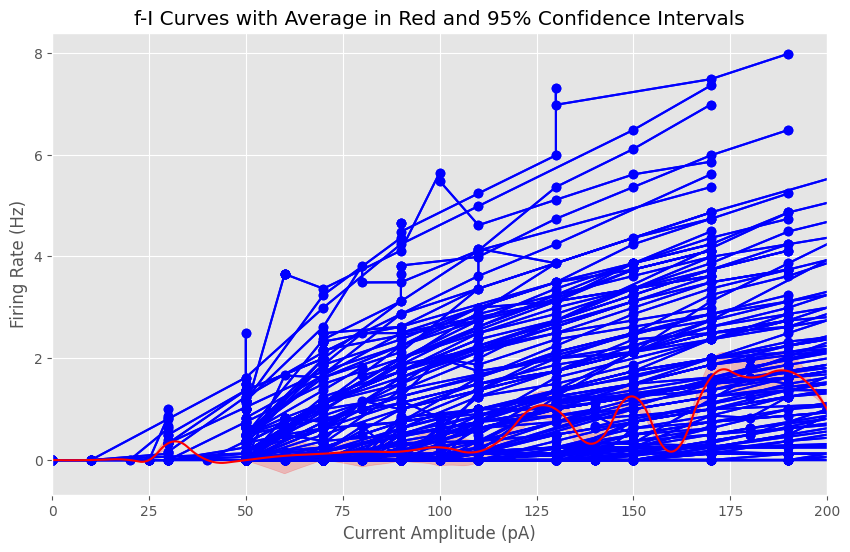

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, interpolate

# Initialize empty lists to store data
all_current_amplitudes = []
all_firing_rates = []

# Initialize a figure
plt.figure(figsize=(10, 6))

# Iterate through the patient data in the dictionary and plot individual f-I curves
for patient_id, patient_data in fI_curve_results.items():
    current_amplitudes = patient_data['current_amplitudes']
    firing_rates = patient_data['firing_rates']
    color = patient_data['color']
    
    # Plot individual f-I curves
    plt.plot(current_amplitudes, firing_rates, marker='o', linestyle='-', color=color, label=f'Patient {patient_id}')
    # Extend the lists with the data from the current patient
    all_current_amplitudes.extend(current_amplitudes)
    all_firing_rates.extend(firing_rates)

# Filter the data up to 200
mask = unique_current_amplitudes <= 200
limited_amplitudes = np.array(unique_current_amplitudes)[mask]
limited_firing_rates = np.array(average_firing_rates)[mask]

# Interpolate the smoothed function
f_smooth = interpolate.interp1d(limited_amplitudes, limited_firing_rates, kind='quadratic')

# Create a series of smoothed points
smoothed_amplitudes = np.linspace(min(limited_amplitudes), max(limited_amplitudes), 1000)
smoothed_firing_rates = f_smooth(smoothed_amplitudes)

# Interpolate the smoothed confidence intervals
conf_int_low_smoothed = f_smooth(smoothed_amplitudes) - np.interp(smoothed_amplitudes, limited_amplitudes, np.array(confidence_intervals)[mask])
conf_int_high_smoothed = f_smooth(smoothed_amplitudes) + np.interp(smoothed_amplitudes, limited_amplitudes, np.array(confidence_intervals)[mask])

# Plot the individual f-I curves first
# Iterate through the patient data in the dictionary and plot individual f-I curves
for patient_id, patient_data in fI_curve_results.items():
    current_amplitudes = patient_data['current_amplitudes']
    firing_rates = patient_data['firing_rates']
    color = patient_data['color']
    
    # Plot individual f-I curves
    plt.plot(current_amplitudes, firing_rates, marker='o', linestyle='-', color=color, label=f'Patient {patient_id}')

# Plot the smoothed function and smoothed confidence intervals on top
plt.plot(smoothed_amplitudes, smoothed_firing_rates, color='red', label='Smoothed Average')
plt.fill_between(smoothed_amplitudes, conf_int_low_smoothed, conf_int_high_smoothed, color='red', alpha=0.2, label='Smoothed 95% CI')

plt.xlabel("Current Amplitude (pA)")
plt.ylabel("Firing Rate (Hz)")
plt.title("f-I Curves with Average in Red and 95% Confidence Intervals")
# Set x-axis limits to 200
plt.xlim([0, 200])
plt.grid(True)

plt.show()


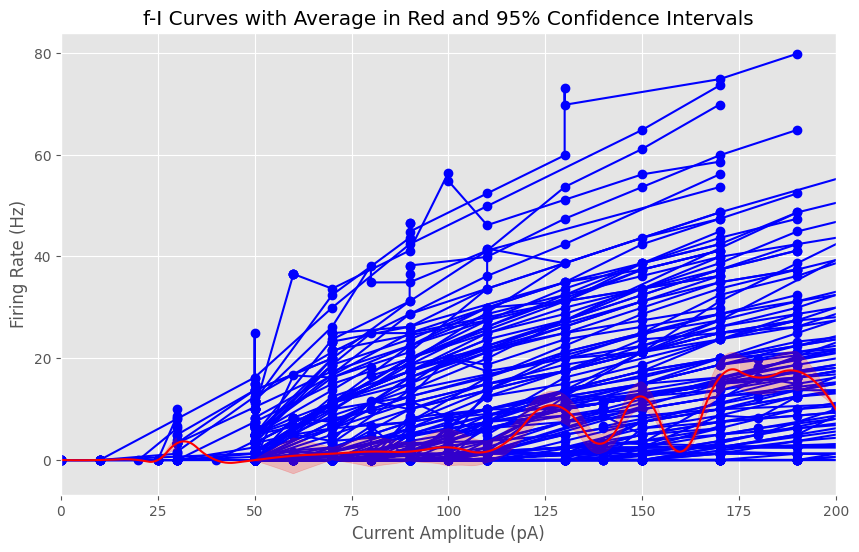

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, interpolate

# Initialize empty lists to store data
all_current_amplitudes = []
all_firing_rates = []

# Initialize a figure
plt.figure(figsize=(10, 6))

# Iterate through the patient data in the dictionary and plot individual f-I curves
for patient_id, patient_data in fI_curve_results.items():
    current_amplitudes = patient_data['current_amplitudes']
    firing_rates = patient_data['firing_rates']
    color = patient_data['color']
    
    # Plot individual f-I curves
    plt.plot(current_amplitudes, np.array(firing_rates)*10, marker='o', linestyle='-', color=color, label=f'Patient {patient_id}')
    
    # Extend the lists with the data from the current patient
    all_current_amplitudes.extend(current_amplitudes)
    all_firing_rates.extend(firing_rates)

# Filter the data up to 200
mask = unique_current_amplitudes <= 200
limited_amplitudes = np.array(unique_current_amplitudes)[mask]
limited_firing_rates = np.array(average_firing_rates)[mask]

# Interpolate the smoothed function
f_smooth = interpolate.interp1d(limited_amplitudes, limited_firing_rates, kind='quadratic')

# Create a series of smoothed points
smoothed_amplitudes = np.linspace(min(limited_amplitudes), max(limited_amplitudes), 1000)
smoothed_firing_rates = f_smooth(smoothed_amplitudes)

# Interpolate the smoothed confidence intervals

# Interpolate the smoothed confidence intervals
conf_int_low_smoothed = f_smooth(smoothed_amplitudes) - np.interp(smoothed_amplitudes, limited_amplitudes, np.array(confidence_intervals)[mask])
conf_int_high_smoothed = f_smooth(smoothed_amplitudes) + np.interp(smoothed_amplitudes, limited_amplitudes, np.array(confidence_intervals)[mask])


# Plot the smoothed function and smoothed confidence intervals on top
plt.plot(smoothed_amplitudes, smoothed_firing_rates*10, color='red', label='Smoothed Average')
plt.fill_between(smoothed_amplitudes, conf_int_low_smoothed*10, conf_int_high_smoothed*10, color='red', alpha=0.2, label='Smoothed 95% CI', zorder=3)

plt.xlabel("Current Amplitude (pA)")
plt.ylabel("Firing Rate (Hz)")
plt.title("f-I Curves with Average in Red and 95% Confidence Intervals")
# Set x-axis limits to 200
plt.xlim([0, 200])
plt.grid(True)

plt.show()

